<div align='center'>
<img src="https://data.seattle.gov/api/assets/82167BD8-353E-4232-96AD-72F5BF83F1D3?Official-Seattle-Logo-White__1_.png" alt="Seattle logo">  
</div>

---

<div align='center'> Projet 4 :Anticipez les besoins en consommation de bâtiments </div>
<div align='center'> Notebook: Analyse exploratoire des données
</div>


# MISSION

La ville de Seattle nous a confié une mission cruciale pour atteindre son objectif de ville neutre en émissions de carbone en 2050 : **prédire les émissions de CO² et la consommation d'énergie des bâtiments non résidentiels**, en évitant les recours à des relevés onéreux.   
En s'appuyant sur les données collectées avec rigueur en 2016, notre équipe s'est engagée dans la **conception d'un modèle prédictif** qui exploite les caractéristiques structurelles des bâtiments.  

Ce rapport expose ma démarche analytique pour répondre à cette problématique, incluant **dans ce fichier, l'analyse exploratoire**, puis dans deux autres documents, l'évaluation de divers modèles prédictifs. Nous porterons ensuite une attention sur l'ENERGY STAR Score afin d'évaluer son impact sur la précision de nos prédictions.

# COMPREHENSION ET PREPARATION DU NOTEBOOK

In [1]:
# Importation des bibliothèques pour l'analyse de données
import numpy as np
import pandas as pd

# Importation des bibliothèques pour la visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importation des bibliothèques pour la modélisation statistique
import statsmodels.api as sm
from scipy.stats import chi2_contingency

# Importation des outils de prétraitement pour le machine learning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Chargement du dataset
chemin_fichier = '/content/drive/MyDrive/Data/Energybenchmarking.csv'

# Lire le fichier CSV
data = pd.read_csv(chemin_fichier)

# Ajustement d'affichage
pd.set_option('display.max_columns', 50)

In [4]:
# Dimensions du jeu de données
temp_string = "Le DataFrame contient {} lignes et {} colonnes.".format( data.shape[0], data.shape[1])
temp_string

'Le DataFrame contient 3376 lignes et 46 colonnes.'

In [5]:
# Aperçu des données
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [6]:
# Informations sur les variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
# Répartition des types de données
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

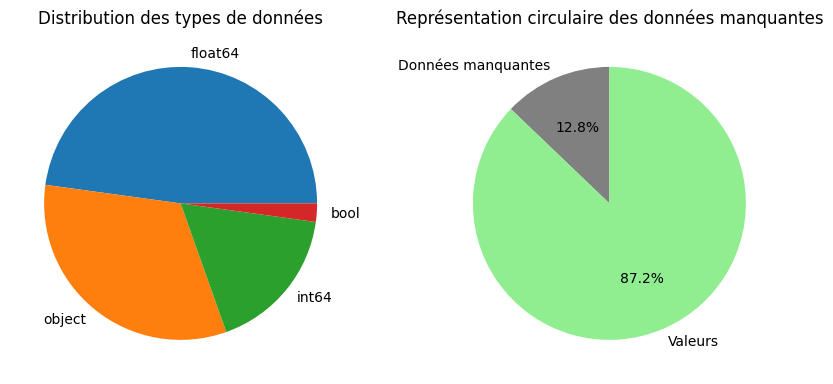

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Premier graphique : Distribution des types de données
data.dtypes.value_counts().plot.pie(ax=axes[0])
axes[0].set_title('Distribution des types de données')

# Deuxième graphique : Représentation circulaire des données manquantes
total_values = data.count().sum()
total_no_values = data.isna().sum().sum()
total = pd.DataFrame({'Category': ['Données manquantes', 'Valeurs'],
                      'Count': [total_no_values, total_values]})
colors = ['grey', 'lightgreen']
axes[1].pie(total['Count'], labels=total['Category'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Représentation circulaire des données manquantes')


plt.tight_layout()
plt.show()

In [9]:
# Aperçu des données manquantes par colonne
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


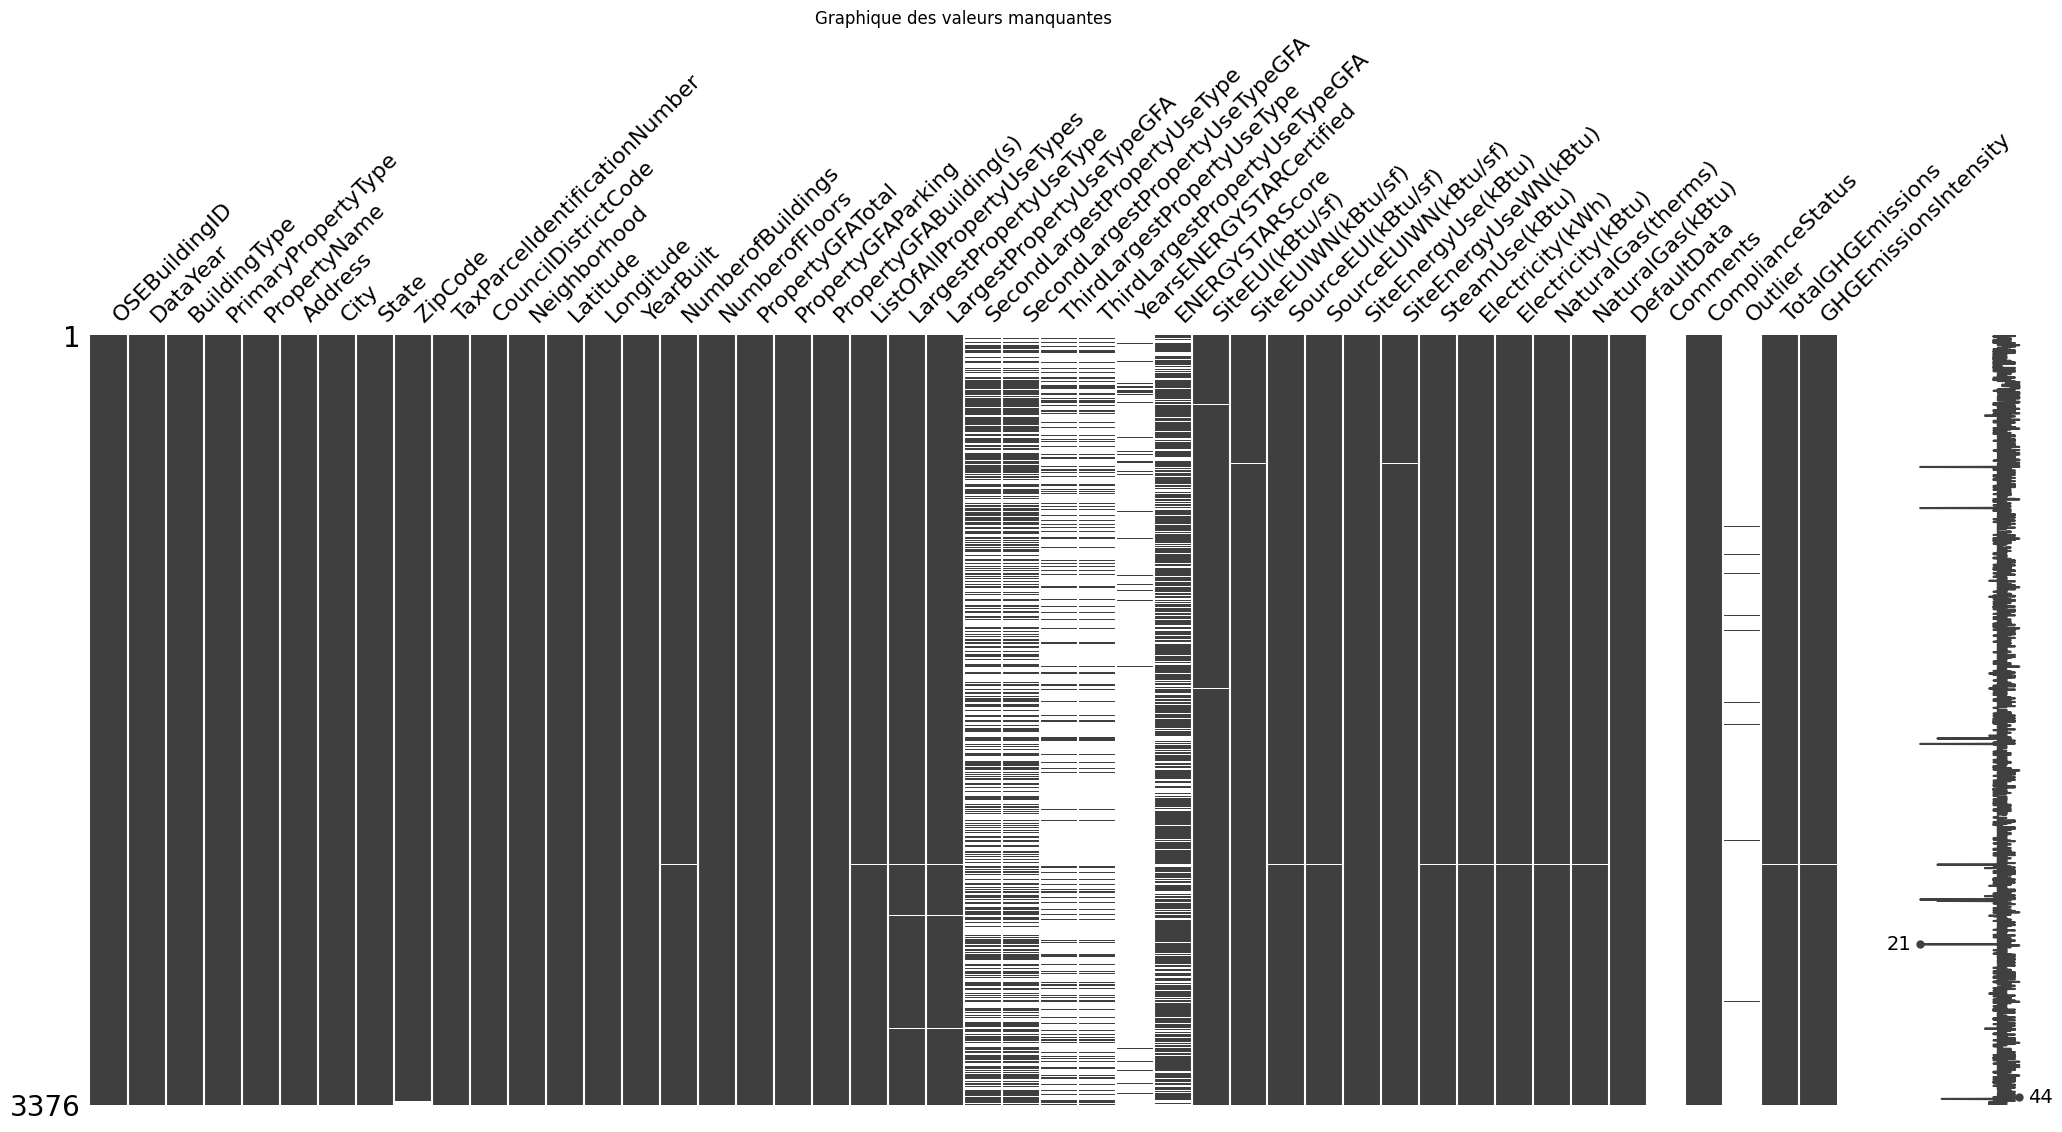

In [10]:
# Graphique des valeurs manquantes dans le dataset
msno.matrix(data)
plt.title('Graphique des valeurs manquantes')
plt.show()

**En conclusion:**  
Le jeu de données fourni par la ville de Seattle, nous permet d'identifier un ensemble de données composé de 3376 enregistrements et 46 variables, réparties en types de données numériques (float64 et int64), catégorielles (object), et une variable booléenne. La répartition des types de données est la suivante : 22 variables en float64, 15 en object, 8 en int64, et 1 en bool.

L'examen des valeurs manquantes révèle que certaines variables, telles que le ZipCode, le NumberofBuildings, et les différents types d'utilisation des propriétés, présentent un faible nombre de valeurs manquantes qui pourront être traitées par des méthodes de nettoyage de données standards.  
Cependant, des variables telles que SecondLargestPropertyUseType, ThirdLargestPropertyUseType, et YearsENERGYSTARCertified présentent un nombre élevé de valeurs manquantes, ce qui pourrait indiquer des données non collectées ou des caractéristiques non applicables à tous les bâtiments.

La variable Comments est entièrement vide et la variable Outlier a très peu de valeurs non manquantes, ce qui suggère que ces colonnes pourraient être exclues de l'analyse sans perte d'information significative. De plus, l'ENERGYSTARScore, une variable clé pour l'évaluation de la performance énergétique des bâtiments, manque dans environ 25% des enregistrements, ce qui nécessitera une attention particulière, soit par imputation, soit par une analyse restreinte aux enregistrements complets.

En somme, ce jeu de données offre une base solide pour l'analyse et la modélisation, avec une richesse d'informations sur les caractéristiques physiques et énergétiques des bâtiments non résidentiels de Seattle. Les prochaines étapes consisteront à nettoyer et préparer ces données pour la modélisation, en tenant compte des défis identifiés lors de cette phase de compréhension des données.

# ANALYSE EXPLORATOIRE DES DONNEES

In [11]:
# Recherche de doublon à partir de l'indentifiant unique des bâtiments
doublon = data["OSEBuildingID"].duplicated().sum()
print(f"Il y a {doublon} doublon(s) dans la colonne 'OSEBuildingID'.")

Il y a 0 doublon(s) dans la colonne 'OSEBuildingID'.


In [12]:
# Suppression de la colonne vide 'Comments'
data = data.drop('Comments',axis=1)

## Analyses descriptives

In [13]:
# Statistiques descriptives : données numériques
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [14]:
# Statistiques descriptives : données catégorielles
data.describe(exclude=np.number)

BuildingType   PrimaryPropertyType     PropertyName  \
count             3376                  3376             3376   
unique               8                    24             3362   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1460                   987                3   

                  Address     City State TaxParcelIdentificationNumber  \
count                3376     3376  3376                          3376   
unique               3354        1     1                          3268   
top     2600 SW Barton St  Seattle    WA                    1625049001   
freq                    4     3376  3376                             8   

       Neighborhood ListOfAllPropertyUseTypes LargestPropertyUseType  \
count          3376                      3367                   3356   
unique           19                       466                     56   
top        DOWNTOWN       Multifamily Housing    Multifamily Housing   
freq            573                       866                   1667   

       SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
count                          1679                         596   
unique                           50                          44   
top                         Parking                Retail Store   
freq                            976                         110   

       YearsENERGYSTARCertified DefaultData ComplianceStatus      Outlier  
count                       119        3376             3376           32  
unique                       65           2                4            2  
top                        2016       False        Compliant  Low outlier  
freq                         14        3263             3211           23

**Unicité des enregistrements :** L'absence de doublons dans la colonne 'OSEBuildingID' assure que chaque bâtiment est unique dans le jeu de données, ce qui est essentiel pour l'intégrité de toute analyse ultérieure.

**Nettoyage des données :** La suppression de la colonne vide 'Comments' réduit le jeu de données en éliminant la caractéristique non informative avant analyse approfondie (100% données manquantes).

**Analyse descriptive des données numériques :** Les statistiques descriptives révèlent des informations clés sur les caractéristiques physiques et énergétiques des bâtiments, telles que l'année de construction, la taille, et la consommation d'énergie. Ces données peuvent être utilisées pour identifier des tendances et des anomalies, et pour évaluer la performance énergétique des bâtiments.

**Analyse descriptive des données catégorielles :** L'examen des variables catégorielles montre une variété dans les types de bâtiments et les usages de propriété, ce qui peut être pertinent pour des analyses sectorielles ou régionales.

## Nettoyage & Filtrage des données

### Informations géographiques

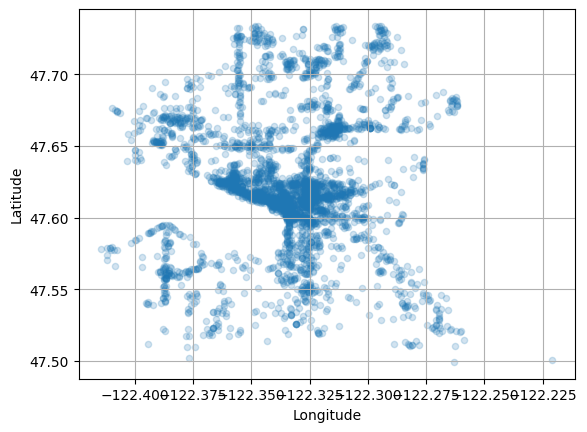

In [15]:
# Visualisation graphique des emplacements des bâtiments // Comparaison faite avec une carte de Seattle
data.plot(kind='scatter',x='Longitude',y='Latitude',grid=True, alpha=0.2)
plt.show()

In [16]:
# Aperçu des codes ZIP présents dans le jeu de données : Recherches internet - Présences de Zipcodes non situés à Seattle
ZipCode = data['ZipCode'].value_counts()
ZipCode.sort_index(ascending=True)

98006.0      1
98011.0      1
98012.0      1
98013.0      2
98020.0      1
98028.0      1
98033.0      1
98040.0      1
98053.0      1
98070.0      1
98101.0    230
98102.0    169
98103.0    161
98104.0    251
98105.0    191
98106.0     50
98107.0    101
98108.0    129
98109.0    294
98111.0      3
98112.0     68
98113.0      1
98114.0      1
98115.0    129
98116.0     93
98117.0     31
98118.0     85
98119.0    167
98121.0    186
98122.0    243
98124.0      2
98125.0    152
98126.0     64
98127.0      1
98133.0    124
98134.0    186
98136.0     28
98144.0     99
98145.0      1
98146.0      6
98154.0      2
98155.0      4
98164.0      2
98165.0      1
98168.0      2
98177.0      2
98178.0      4
98181.0      1
98185.0      1
98191.0      1
98195.0     10
98198.0      1
98199.0     70
98204.0      1
98272.0      1
Name: ZipCode, dtype: int64

In [17]:
# Suprression des ZipCode extérieurs à Seattle
valeurs_a_exclure = [98006, 98011, 98013, 98020, 98033, 98053, 98070, 98155, 98168]
data = data.loc[~data['ZipCode'].isin(valeurs_a_exclure)]

In [18]:
# Aperçu des valeurs dans la feature 'Neighborhood'
data['Neighborhood'].value_counts()

DOWNTOWN                  571
EAST                      453
MAGNOLIA / QUEEN ANNE     422
GREATER DUWAMISH          372
NORTHEAST                 279
LAKE UNION                249
NORTHWEST                 208
SOUTHWEST                 165
NORTH                     144
BALLARD                   126
CENTRAL                   107
SOUTHEAST                  95
DELRIDGE                   80
North                      41
Central                    27
Northwest                  11
Ballard                     7
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [19]:
# Dictionnaire de corrections
corrections = {
    'North': 'NORTH',
    'Central': 'CENTRAL',
    'Northwest': 'NORTHWEST',
    'Ballard': 'BALLARD',
    'Delridge': 'DELRIDGE',
    'DELRIDGE NEIGHBORHOODS': 'DELRIDGE'
}

In [20]:
data['Neighborhood'].replace(corrections, inplace=True)

<ipython-input-20-7fc920d828dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Neighborhood'].replace(corrections, inplace=True)


In [21]:
# Aperçu des valeurs dans la feature 'Neighborhood' après traitement
data['Neighborhood'].value_counts()

DOWNTOWN                 571
EAST                     453
MAGNOLIA / QUEEN ANNE    422
GREATER DUWAMISH         372
NORTHEAST                279
LAKE UNION               249
NORTHWEST                219
NORTH                    185
SOUTHWEST                165
CENTRAL                  134
BALLARD                  133
SOUTHEAST                 95
DELRIDGE                  85
Name: Neighborhood, dtype: int64

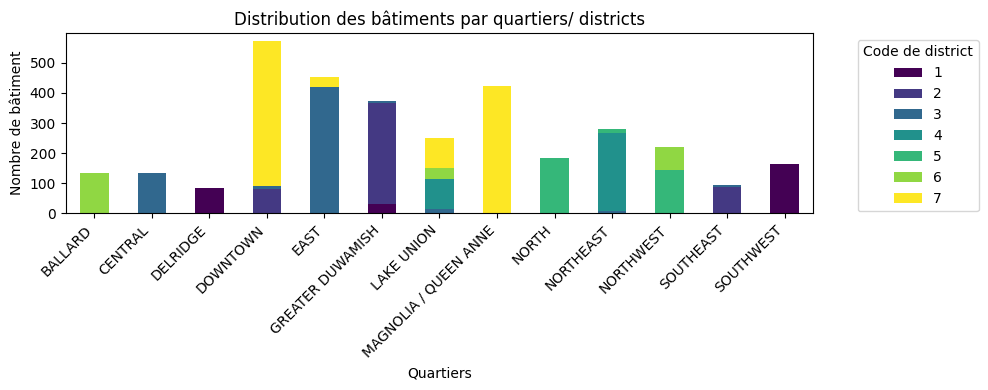

In [22]:
# Graphique de la distribution des bâtiments par rapport aux quartiers & numéros de districts
pivot_district = pd.pivot_table(data, index='Neighborhood', columns='CouncilDistrictCode', aggfunc='size', fill_value=0)

pivot_district.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 4))
plt.title('Distribution des bâtiments par quartiers/ districts')
plt.xlabel('Quartiers')
plt.ylabel('Nombre de bâtiment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Code de district', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

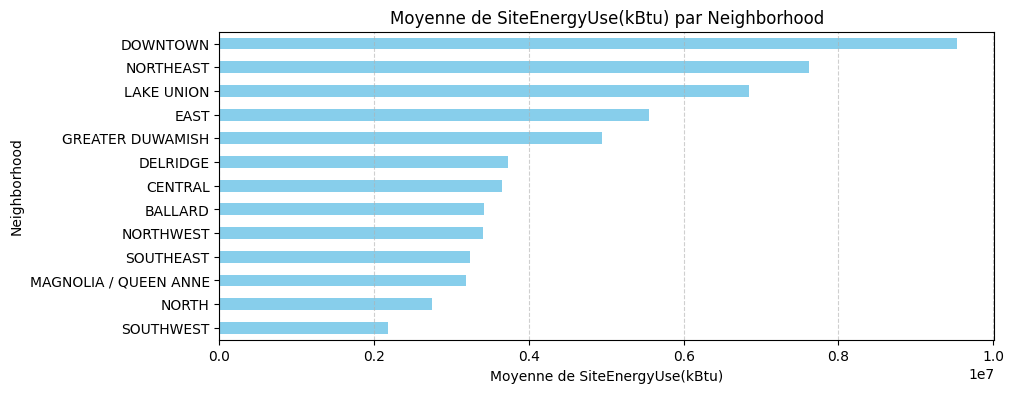

In [23]:
# Graphique de la moyenne d'utilisation d'énergie par rapport aux quartiers
average_energy_by_neighborhood = data.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].mean()
average_energy_by_neighborhood = average_energy_by_neighborhood.sort_values()

plt.figure(figsize=(10, 4))
average_energy_by_neighborhood.plot(kind='barh', color='skyblue')
plt.title('Moyenne de SiteEnergyUse(kBtu) par Neighborhood')
plt.xlabel('Moyenne de SiteEnergyUse(kBtu)')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

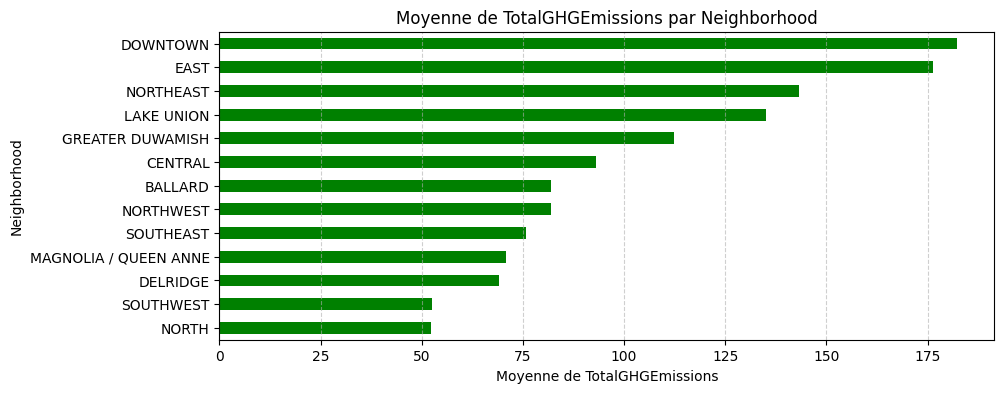

In [24]:
# Graphique de la moyenne d'emission d'effet de serre par rapport aux quartiers
average_GHGEmissions_by_neighborhood = data.groupby('Neighborhood')['TotalGHGEmissions'].mean()
average_GHGEmissions_by_neighborhood = average_GHGEmissions_by_neighborhood.sort_values()

plt.figure(figsize=(10, 4))
average_GHGEmissions_by_neighborhood.plot(kind='barh', color='green')
plt.title('Moyenne de TotalGHGEmissions par Neighborhood')
plt.xlabel('Moyenne de TotalGHGEmissions')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

### Informations d'activités

In [25]:
# Aperçu des valeurs dans la feature 'BuildingType'
data['BuildingType'].value_counts()

NonResidential          1447
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    23
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [26]:
data[data['BuildingType']== 'Nonresidential WA']

OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
3359          50101      2016  Nonresidential WA          University   

      PropertyName               Address     City State  ZipCode  \
3359  Burke Museum  4331 Memorial Way NE  Seattle    WA  98195.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3359                    1625049001                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3359  47.66127 -122.31256       1962                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3359             68072                   0                   68072   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3359        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3359                    68916.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
3359                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3359              NaN         46.200001           46.200001   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
3359          144.899994            144.899994           3180819.25   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3359             3180819.25             0.0       932244.6875   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3359          3180819.0                 0.0               0.0        False   

     ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
3359        Compliant     NaN              22.17                   0.33

In [27]:
# Regroupement en 1 catégorie
correction = {
    'Nonresidential WA': 'NonResidential'}

data.loc[:, 'BuildingType'] = data['BuildingType'].replace(corrections)

In [28]:
# Creation d'un df pour effectuer d'avantage de nettoyage & filtrage
df_filtred = data.copy()

In [29]:
# Filtrage des bâtiments non résidentiels
df_filtred = data.loc[data['BuildingType'] == 'NonResidential']

In [30]:
# Aperçu de la répartition des "types principaux" des bâtiments
df_filtred['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          181
Warehouse                      179
Large Office                   167
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             49
Supermarket / Grocery Store     39
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [31]:
# Filtrage des types non résidentiels
valeurs_a_exclure = ['Low-Rise Multifamily', 'Residence Hall']
df_filtred = df_filtred[~df_filtred['PrimaryPropertyType'].isin(valeurs_a_exclure)]

In [32]:
# Simplification de la catégorie "Office"
df_filtred['PrimaryPropertyType'].replace(['Small- and Mid-Sized Office','Large Office'],'Office', inplace=True)

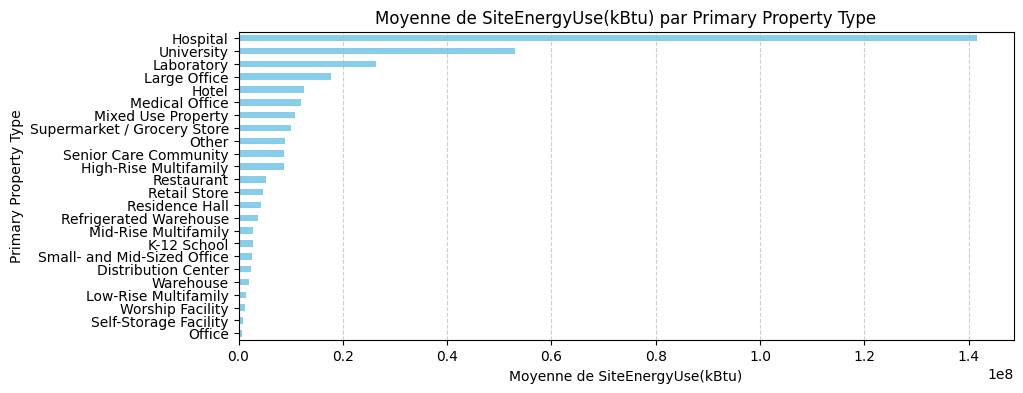

In [33]:
# Graphique de la moyenne de consommation d'énergie par rapport aux types principaux de propriété
average_energy_by_primarypropertytype = data.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].mean()
average_energy_by_primarypropertytype = average_energy_by_primarypropertytype.sort_values()

plt.figure(figsize=(10, 4))
average_energy_by_primarypropertytype.plot(kind='barh', color='skyblue')
plt.title('Moyenne de SiteEnergyUse(kBtu) par Primary Property Type')
plt.xlabel('Moyenne de SiteEnergyUse(kBtu)')
plt.ylabel('Primary Property Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

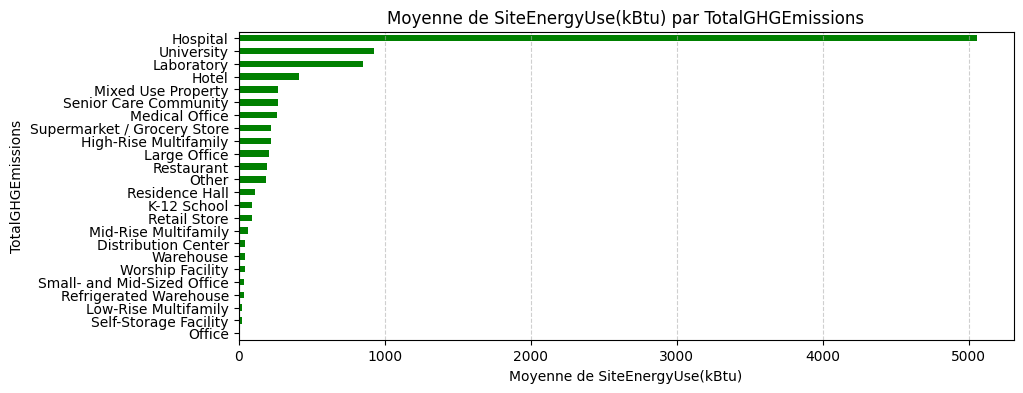

In [34]:
# Graphique de la moyenne d'emission d'effet de serre par rapport aux types principaux de propriété
average_totalGHGEmissions_by_primarypropertytype = data.groupby('PrimaryPropertyType')['TotalGHGEmissions'].mean()
average_totalGHGEmissions_by_primarypropertytype = average_totalGHGEmissions_by_primarypropertytype.sort_values()

plt.figure(figsize=(10, 4))
average_totalGHGEmissions_by_primarypropertytype.plot(kind='barh', color='green')
plt.title('Moyenne de SiteEnergyUse(kBtu) par TotalGHGEmissions')
plt.xlabel('Moyenne de SiteEnergyUse(kBtu)')
plt.ylabel('TotalGHGEmissions')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [35]:
# Aperçu de la répartition des "utilisations principales" des bâtiments
df_filtred['LargestPropertyUseType'].value_counts()

Office                                                  477
Non-Refrigerated Warehouse                              191
Retail Store                                             97
Hotel                                                    76
Worship Facility                                         71
Other                                                    70
Distribution Center                                      50
Supermarket/Grocery Store                                40
Medical Office                                           40
K-12 School                                              39
Parking                                                  29
Self-Storage Facility                                    27
Senior Care Community                                    20
Other - Entertainment/Public Assembly                    18
College/University                                       17
Laboratory                                               13
Refrigerated Warehouse                  

In [36]:
# Filtrage des types principaux non résidentiels
valeurs_a_exclure = ['Multifamily Housing', 'Other - Lodging/Residential','Residence Hall/Dormitory']
df_filtred = df_filtred[~df_filtred['LargestPropertyUseType'].isin(valeurs_a_exclure)]

### Informations conformité

In [37]:
# Aperçu des données dites 'aberrantes'
df_filtred['Outlier'].value_counts()

Low outlier     12
High outlier     2
Name: Outlier, dtype: int64

In [38]:
# Nombre de données manquantes dans 'Outlier'
df_filtred['Outlier'].isna().sum()

1395

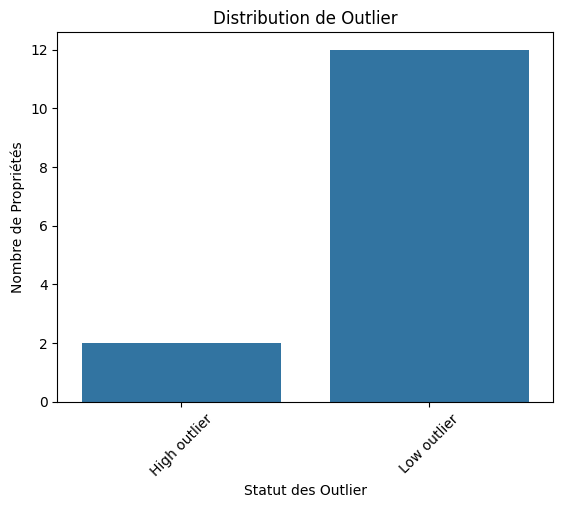

In [39]:
# Représentation graphique des données aberrantes des bâtiments non résidentiels
sns.countplot(x='Outlier', data=df_filtred)
plt.title('Distribution de Outlier')
plt.xlabel('Statut des Outlier')
plt.ylabel('Nombre de Propriétés')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Aperçu des données de conformités
df_filtred['ComplianceStatus'].value_counts()

Compliant                       1382
Non-Compliant                     16
Error - Correct Default Data      10
Missing Data                       1
Name: ComplianceStatus, dtype: int64

In [41]:
# Nombre de données manquantes dans 'ComplianceStatus'
df_filtred['ComplianceStatus'].isna().sum()

0

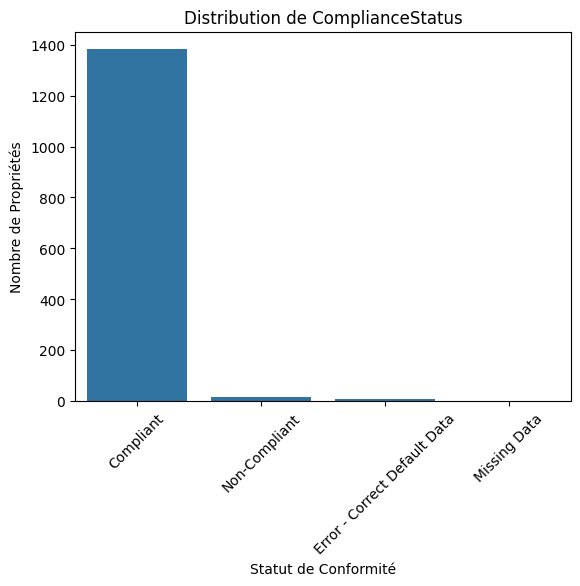

In [42]:
# Représentation graphique de la conformité des bâtiments non résidentiels
sns.countplot(x='ComplianceStatus', data=df_filtred)
plt.title('Distribution de ComplianceStatus')
plt.xlabel('Statut de Conformité')
plt.ylabel('Nombre de Propriétés')
plt.xticks(rotation=45)
plt.show()

In [43]:
df_filtred[df_filtred['ComplianceStatus']=='Missing Data']

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
746          19776      2016  NonResidential               Other   

                       PropertyName             Address     City State  \
746  Welcome Home Society - PriceCo  13537 Aurora Ave N  Seattle    WA   

     ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
746  98133.0                    0164000020                    5    NORTHWEST   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
746  47.72777 -122.34503       2002                1.0               1   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
746             29924                   0                   29924   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
746         Other - Education      Other - Education   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
746                    29924.0                          NaN   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
746                              NaN                         NaN   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
746                             NaN                      NaN              NaN   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
746               0.0                 0.0                 0.0   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
746                   0.0                  0.0                    0.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
746             0.0               0.0                0.0                 0.0   

     NaturalGas(kBtu)  DefaultData ComplianceStatus Outlier  \
746               0.0        False     Missing Data     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity  
746                0.0                    0.0

In [44]:
df_filtred[df_filtred['ComplianceStatus']=='Error - Correct Default Data']

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
276             405      2016  NonResidential              Office   
457             618      2016  NonResidential              Office   
1045          20617      2016  NonResidential        Retail Store   
1466          21898      2016  NonResidential           Warehouse   
1467          21902      2016  NonResidential           Warehouse   
1641          22953      2016  NonResidential        Retail Store   
1656          23011      2016  NonResidential        Retail Store   
1977          24030      2016  NonResidential        Retail Store   
2076          24374      2016  NonResidential        Retail Store   
2682          26593      2016  NonResidential              Office   

                  PropertyName                           Address     City  \
276                The Decatur                   1511 6th Avenue  Seattle   
457                Prefontaine              110 Prefontaine Pl S  Seattle   
1045     Seattle Habitat Store                    21 S Nevada St  Seattle   
1466      Halfon Candy Company            9229 10th Avenue South  Seattle   
1467                    Samson               9928 10th Ave South  Seattle   
1641                  Tux Shop                  10716 5th Ave NE  Seattle   
1656                     Bevmo                  10700 5th Ave NE  Seattle   
1977           King Plaza 6951  6951 Martin Luther King Jr Way S  Seattle   
2076  Jumbo chinese restaurant              4208 rainier ave so.  Seattle   
2682           Delmar Building           108 South Washington St  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
276     WA  98101.0                    1975700125                    7   
457     WA  98104.0                    5247801045                    7   
1045    WA  98134.0                    1824049074                    2   
1466    WA  98108.0                    2433700076                    1   
1467    WA  98108.0                    2433700165                    1   
1641    WA  98125.0                    2926049039                    5   
1656    WA  98125.0                    2926049223                    5   
1977    WA  98118.0                    3333002890                    2   
2076    WA  98118.0                    7950301480                    2   
2682    WA  98104.0                    5247800481                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
276           DOWNTOWN  47.61166 -122.33528       1921                1.0   
457           DOWNTOWN  47.60159 -122.32915       1909                1.0   
1045  GREATER DUWAMISH  47.56535 -122.34054       1953                1.0   
1466  GREATER DUWAMISH  47.51968 -122.32120       1978                1.0   
1467  GREATER DUWAMISH  47.51918 -122.31957       1979                1.0   
1641             NORTH  47.70747 -122.32249       1965                1.0   
1656             NORTH  47.70708 -122.32251       1966                1.0   
1977  GREATER DUWAMISH  47.53922 -122.28295       2002                1.0   
2076         SOUTHEAST  47.56514 -122.28781       1968                1.0   
2682          DOWNTOWN  47.60102 -122.33378       1900                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
276                4            127268                   0   
457                6             73470                   0   
1045               1             39900                   0   
1466               1             31300                   0   
1467               1             22000                   0   
1641               1             24982                   0   
1656               1             41615                   0   
1977               2             54211               17471   
2076               1             36071                   0   
2682               4             22840                   0   

      PropertyGFABuilding(s)  \
276                 

In [45]:
#Test Chi² - Statuts de conformité - Types principaux de propriété
contingency_table1 = pd.crosstab(df_filtred['ComplianceStatus'], df_filtred['PrimaryPropertyType'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 50.356904530960946
P-value: 0.4991244227717879
Degrees of Freedom: 51


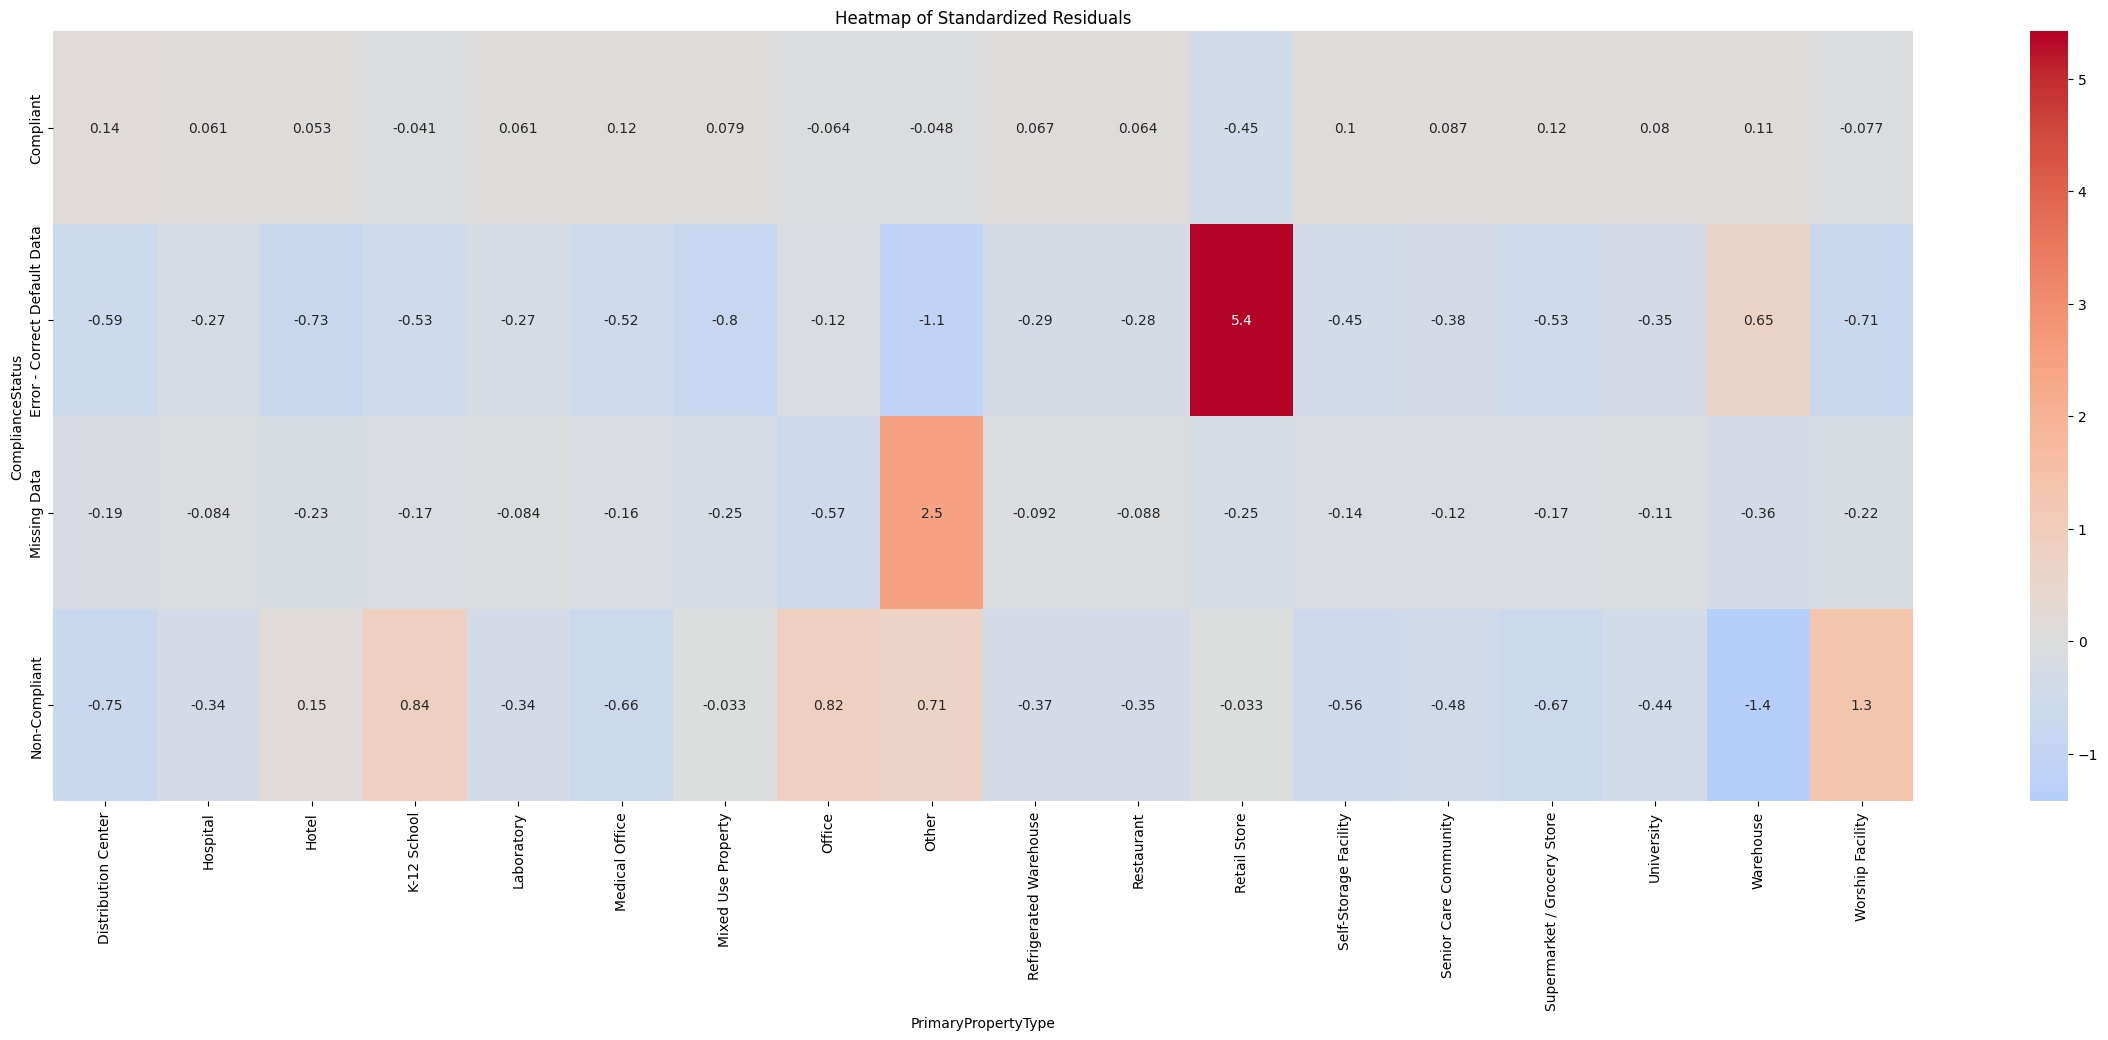

In [46]:
# Carte thermique des écarts normalisés par type de propriété et statut de conformité
residuals = (contingency_table1 - expected) / np.sqrt(expected)

residuals_df = pd.DataFrame(residuals, index=contingency_table1.index, columns=contingency_table1.columns)

plt.figure(figsize=(30,10 ))
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Standardized Residuals')
plt.ylabel('ComplianceStatus')
plt.xlabel('PrimaryPropertyType')
plt.show()

In [47]:
#Test Chi² - Statuts de conformité - Quartiers
contingency_table2 = pd.crosstab(df_filtred['ComplianceStatus'], df_filtred['Neighborhood'])

chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 55.69395433725673
P-value: 0.019137061783796174
Degrees of Freedom: 36


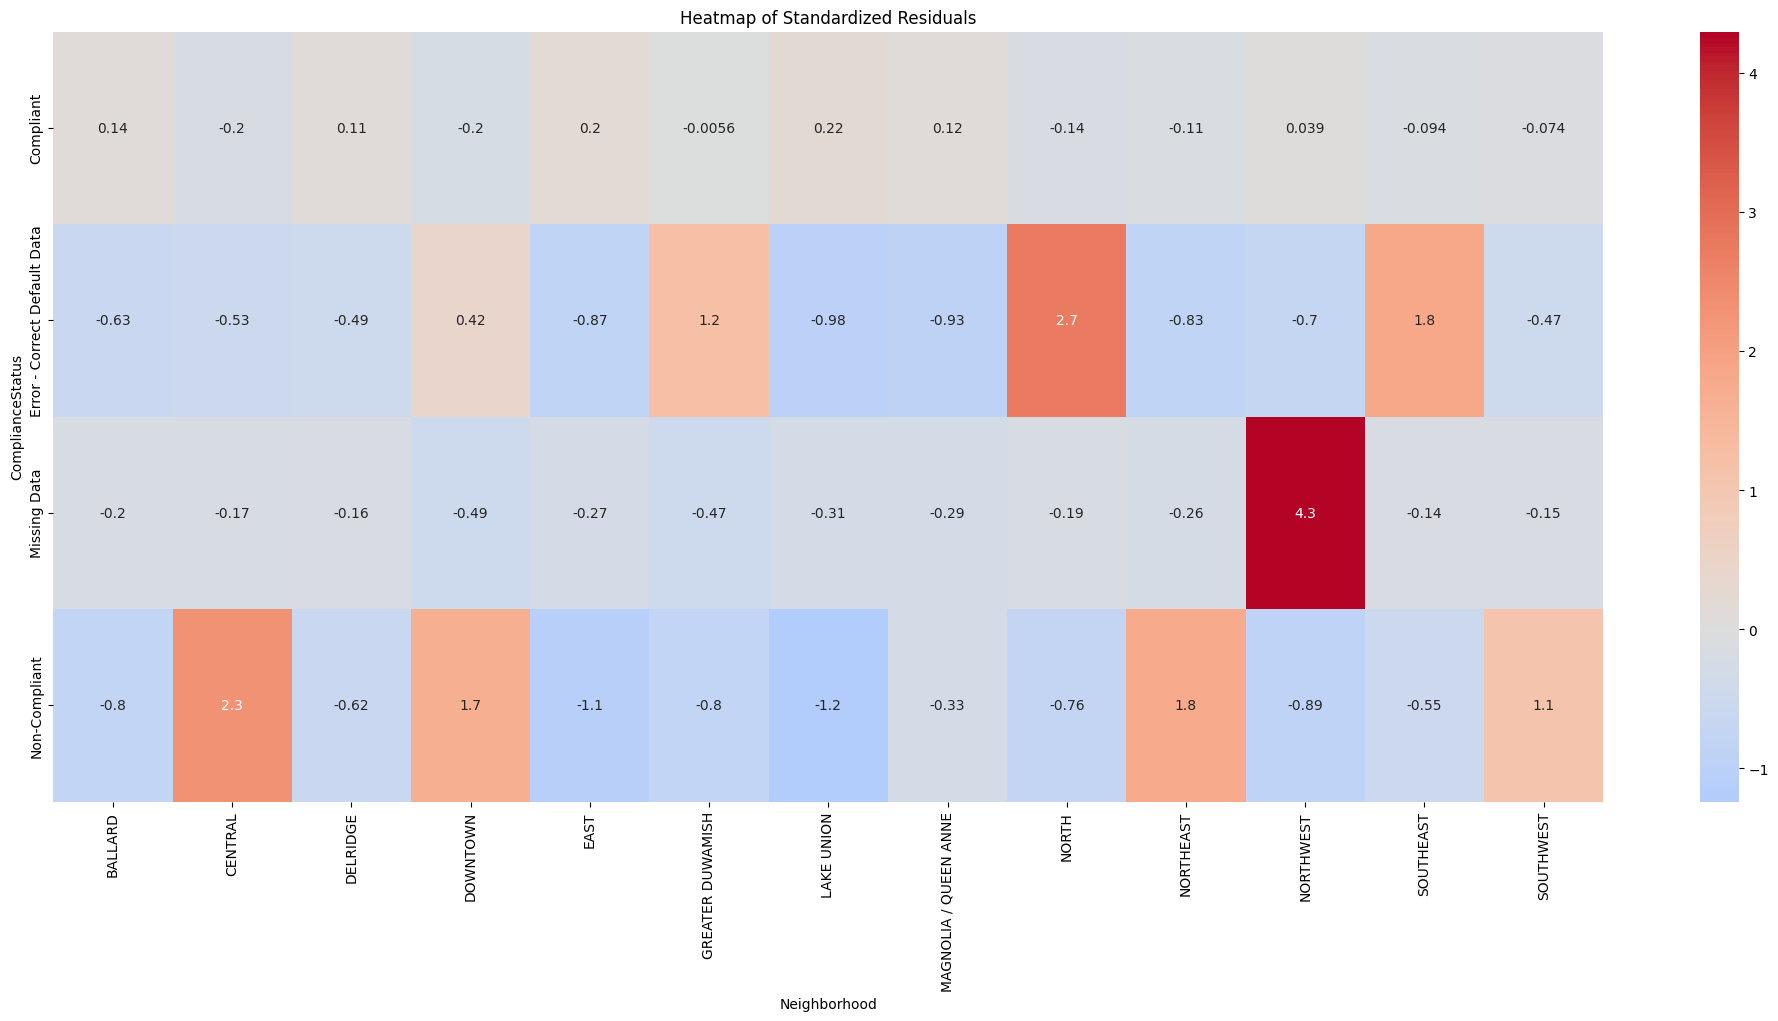

In [48]:
# Carte thermique des écarts normalisés par type de propriété et quartiers
residuals = (contingency_table2 - expected) / np.sqrt(expected)

residuals_df = pd.DataFrame(residuals, index=contingency_table2.index, columns=contingency_table2.columns)

plt.figure(figsize=(25,10 ))
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Standardized Residuals')
plt.ylabel('ComplianceStatus')
plt.xlabel('Neighborhood')
plt.show()

In [49]:
#Test Chi² - Statuts de conformité - Usage principale du bâtiment
contingency_table3 = pd.crosstab(df_filtred['ComplianceStatus'], df_filtred['LargestPropertyUseType'])

chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 493.1128065423891
P-value: 1.4056382237233383e-40
Degrees of Freedom: 141


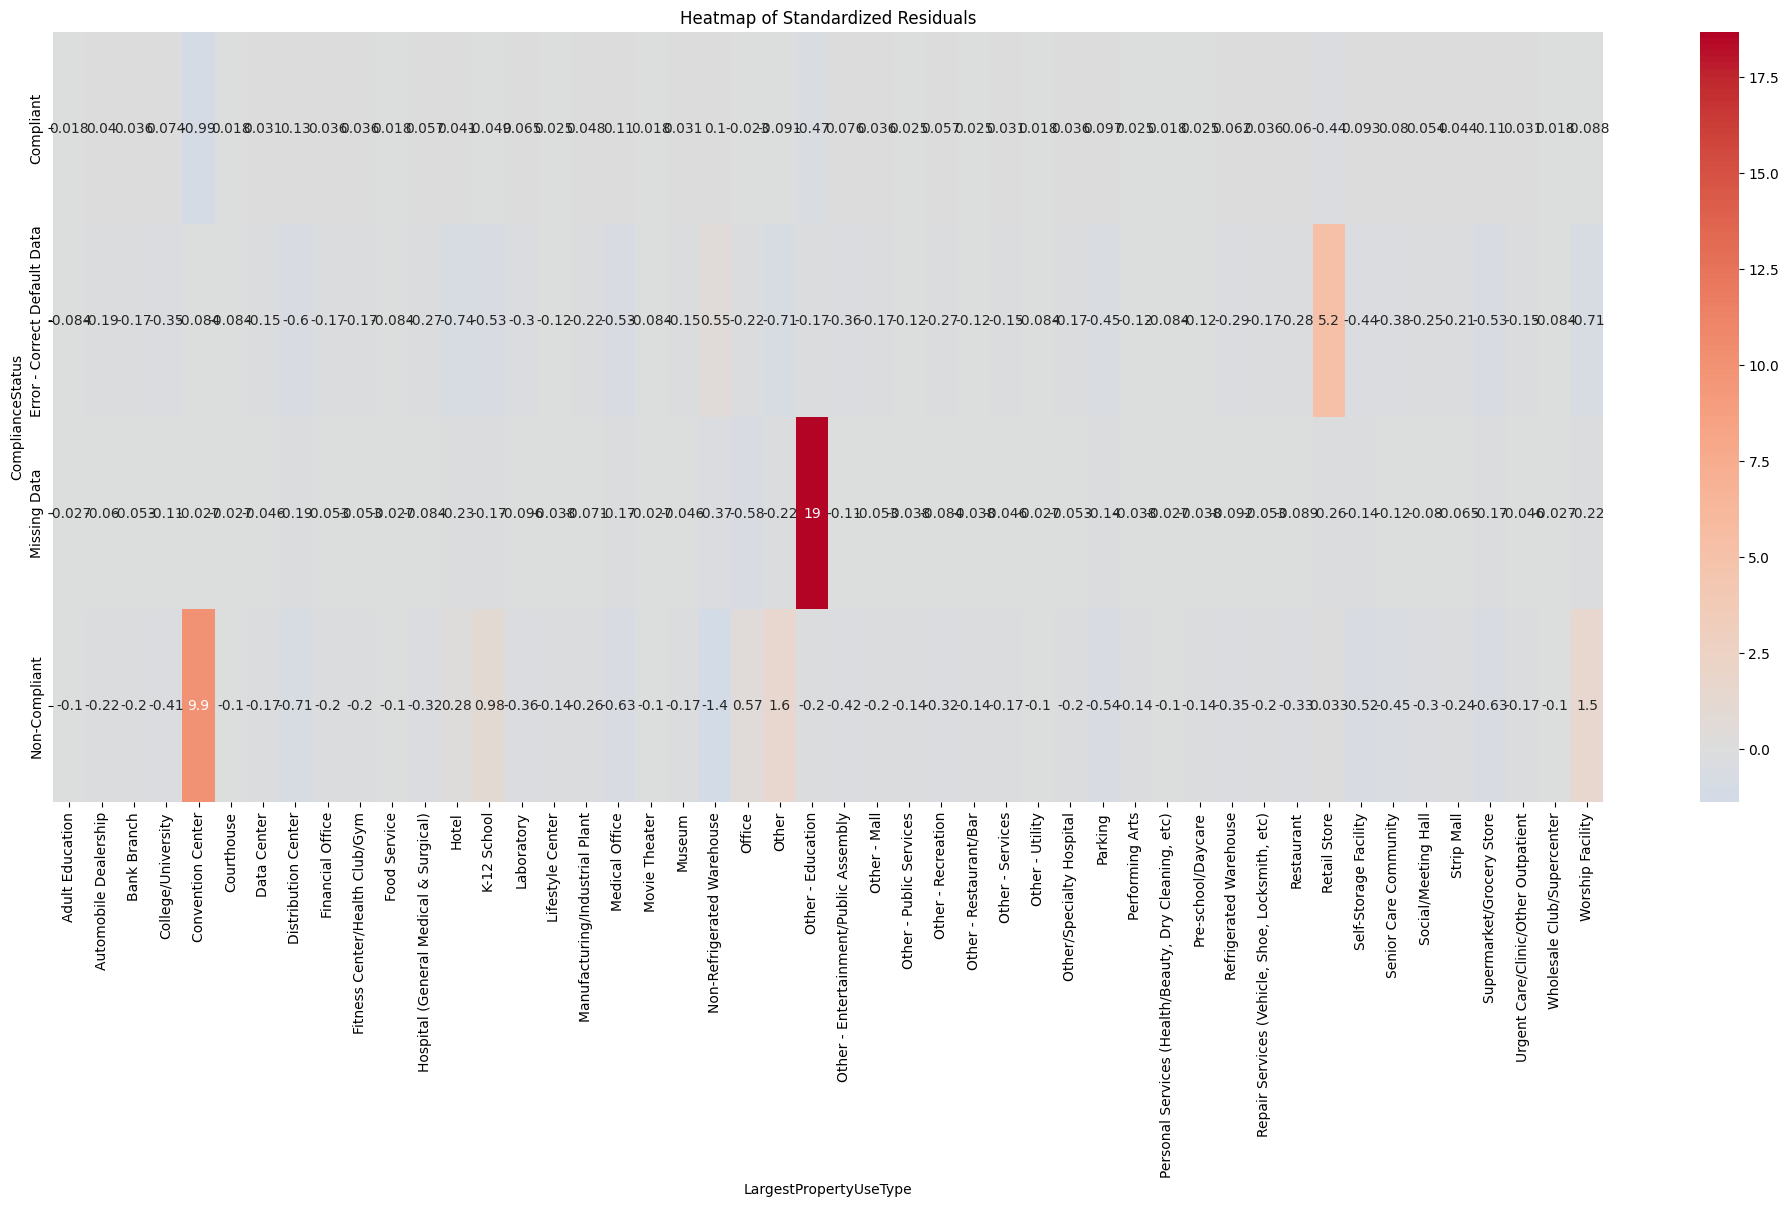

In [50]:
# Carte thermique des écarts normalisés par type de propriété et les usages principales des bâtiments
residuals = (contingency_table3 - expected) / np.sqrt(expected)

residuals_df = pd.DataFrame(residuals, index=contingency_table3.index, columns=contingency_table3.columns)

plt.figure(figsize=(25,10 ))
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Standardized Residuals')
plt.ylabel('ComplianceStatus')
plt.xlabel('LargestPropertyUseType')
plt.show()

In [51]:
#Filtrage après Chi-2 & Heatmaps
valeurs_a_exclure = ['Missing Data', 'Error - Correct Default Data']
df_filtred = df_filtred[~df_filtred['ComplianceStatus'].isin(valeurs_a_exclure)]

df_filtred = df_filtred.loc[~((df_filtred['ComplianceStatus'] == 'Non Compliant') & (df_filtred['LargestPropertyUseType'] == 'Convention Center'))]
df_filtred = df_filtred.loc[~((df_filtred['ComplianceStatus'] == 'Non Compliant') & (df_filtred['Neighborhood'] == 'CENTRAL'))]

### Informations architecturales

In [52]:
# Aperçu du nombre de bâtiments égal à 0
df_filtred[df_filtred['NumberofBuildings']== 0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
63               89      2016  NonResidential               Medical Office   
76              113      2016  NonResidential                       Office   
160             257      2016  NonResidential                    Warehouse   
201             322      2016  NonResidential                       Office   
241             366      2016  NonResidential                       Office   
264             391      2016  NonResidential           Mixed Use Property   
278             408      2016  NonResidential                       Office   
280             410      2016  NonResidential                        Hotel   
291             421      2016  NonResidential                        Other   
365             517      2016  NonResidential  Supermarket / Grocery Store   
417             576      2016  NonResidential                        Other   
429             588      2016  NonResidential           Mixed Use Property   
433             594      2016  NonResidential                        Other   
477             640      2016  NonResidential                       Office   
481             649      2016  NonResidential                       Office   
488             657      2016  NonResidential           Mixed Use Property   
494             673      2016  NonResidential                 Retail Store   
544             735      2016  NonResidential                    Warehouse   
608             812      2016  NonResidential                    Warehouse   
809           19900      2016  NonResidential                   Laboratory   
985           20427      2016  NonResidential           Mixed Use Property   
1002          20474      2016  NonResidential                        Other   
1177          21180      2016  NonResidential                        Other   
1244          21336      2016  NonResidential                        Other   
1256          21365      2016  NonResidential               Medical Office   
1317          21508      2016  NonResidential                        Other   
2054          24270      2016  NonResidential             Worship Facility   
2115          24514      2016  NonResidential  Supermarket / Grocery Store   
2188          24716      2016  NonResidential       Refrigerated Warehouse   
2214          24822      2016  NonResidential                       Office   
2382          25461      2016  NonResidential                   Restaurant   
2441          25661      2016  NonResidential                       Office   
2482          25772      2016  NonResidential                     Hospital   
2564          26119      2016  NonResidential                 Retail Store   
2631          26331      2016  NonResidential                       Office   
2708          26706      2016  NonResidential                       Office   
2715          26719      2016  NonResidential                       Office   
2747          26833      2016  NonResidential                       Office   
2963          27673      2016  NonResidential                        Hotel   
3108          33289      2016  NonResidential                       Office   
3121          36034      2016  NonResidential                 Retail Store   
3205          49783      2016  NonResidential                   Laboratory   
3259          49924      2016  NonResidential                       Office   

                                      PropertyName  \
63                       Polyclinic North && South   
76                                           KCTS9   
160          Harbor Island: Warehouse E - DNRP-SWD   
201          Cox Media Group Seattle KIRO TV (322)   
241             University District Office Buiding   
264                                  Thaw Building   
278                       Fourth and Pike Building   
280                                  Motif Seattle   
291                                Meridian (East)   
365                            Sa

In [53]:
# Aperçu du nombre de bâtiments égal à 9
df_filtred[df_filtred['NumberofBuildings']== 9]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
170            276      2016  NonResidential            Hospital   

                  PropertyName       Address     City State  ZipCode  \
170  Harborview Medical Center  325 9th Ave.  Seattle    WA  98104.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
170                    8590900220                    3         EAST  47.60399   

     Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
170 -122.32377       2000                9.0               8   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
170           1158691                   0                 1158691   

                          ListOfAllPropertyUseTypes  \
170  Hospital (General Medical & Surgical), Parking   

                    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
170  Hospital (General Medical & Surgical)                  1350182.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
170                      Parking                         387651.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
170                         NaN                             NaN   

    YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
170                      NaN             29.0        217.100006   

     SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
170          219.699997          502.899994            502.799988   

     SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
170          293090784.0            296671744.0     122575032.0   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
170        49438336.0        168683602.0         18321.29102   

     NaturalGas(kBtu)  DefaultData ComplianceStatus Outlier  \
170         1832129.0        False        Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity  
170           10734.57                   9.26

In [54]:
# Aperçu du nombre d'étage dans le bâtiment égal à 99
df_filtred[df_filtred['NumberofFloors']== 99]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
1359          21611      2016  NonResidential    Worship Facility   

                        PropertyName                   Address     City State  \
1359  Seattle Chinese Baptist Church  5801 Beacon Avenue South  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
1359  98108.0                    2124049098                    2   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
1359  GREATER DUWAMISH  47.55072 -122.30265       1977                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1359              99             21948                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1359                   21948          Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1359                    21948.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1359                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1359             80.0              14.9                14.9   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
1359           46.599998             46.599998          326001.1875   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
1359            326001.1875             0.0           95545.5   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
1359           326001.0                 0.0               0.0        False   

     ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
1359        Compliant     NaN               2.27                    0.1

In [55]:
# Traitement des valeurs repérées dites 'aberrantes'

df_filtred = df_filtred[(df_filtred['NumberofBuildings'] > 0) &
                 (df_filtred['NumberofFloors'] < 99) &
                 (df_filtred['SiteEUIWN(kBtu/sf)'] > 0) &
                 (df_filtred['TotalGHGEmissions'] > 0)]

In [56]:
data['YearBuilt'].value_counts()

2000    72
1989    67
2014    67
2008    66
1999    64
        ..
1942     3
1939     2
1944     2
1936     1
1935     1
Name: YearBuilt, Length: 113, dtype: int64

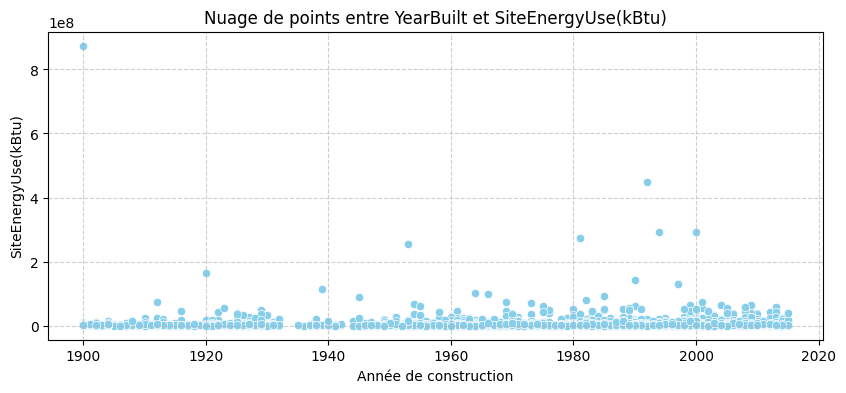

In [57]:
# Graphique de la consommation énergétique en fonction de l'année de construction des bâtiments
plt.figure(figsize=(10, 4))
sns.scatterplot(x='YearBuilt', y='SiteEnergyUse(kBtu)', data=data, color='skyblue')
plt.title('Nuage de points entre YearBuilt et SiteEnergyUse(kBtu)')
plt.xlabel('Année de construction')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.show()

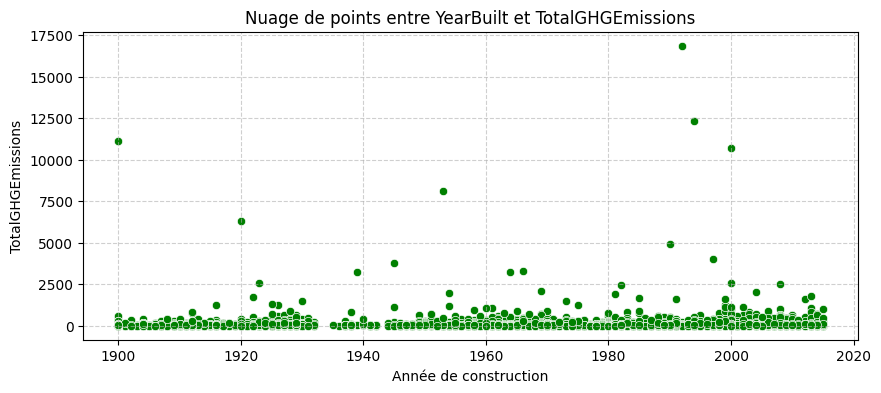

In [58]:
# Graphique de la consommation total d'emissions de gaz à effet de serre en fonction de l'année de construction des bâtiments
plt.figure(figsize=(10, 4))
sns.scatterplot(x='YearBuilt', y='TotalGHGEmissions', data=data, color='green')
plt.title('Nuage de points entre YearBuilt et TotalGHGEmissions')
plt.xlabel('Année de construction')
plt.ylabel('TotalGHGEmissions')
plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.show()

**Suppression des colonnes redondantes ou inutiles pour la suite**

In [59]:
# Identification uniques du bâtiment : 'OSEBuildingID', 'PropertyName', 'TaxParcelIdentificationNumber'
colonnes_a_supprimer = ['OSEBuildingID','PropertyName', 'TaxParcelIdentificationNumber']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [60]:
# Localisation du bâtiment : 'Address', 'City', 'State', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood','Latitude','Longitude'
colonnes_a_supprimer = ['Address', 'City','State', 'ZipCode', 'CouncilDistrictCode']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [61]:
# Activités du bâtiment : 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'
colonnes_a_supprimer = ['LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [62]:
# Colonnes inexploitables/ inutiles / déjà traités
colonnes_a_supprimer = ['Outlier', 'DefaultData','ComplianceStatus', 'YearsENERGYSTARCertified', 'BuildingType']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

**Conclusion du Nettoyage et Filtrage des Données :**

**Nettoyage Géographique :** Correction et validation des codes postaux pour s'assurer que les données se limitent exclusivement à la ville de Seattle.

**Standardisation des Quartiers :** Correction des erreurs typographiques.

**Analyse de la Distribution Géographique :** Visualisation et examen de la répartition des bâtiments par quartier.

**Sélection des Types de Bâtiments :** Restriction de l'étude aux bâtiments non résidentiels et regroupement des catégories de bâtiments pour affiner l'analyse.

**Identification des Caractéristiques Clés :** Utilisation de visualisations pour détecter les tendances importantes en matière de consommation énergétique et d'émissions, orientant la sélection des variables pour le modèle prédictif.

**Traitement des Données de Conformité :** Suppression de la colonne 'Outlier' pour cause de données manquantes et application de tests du Chi² pour choisir les données à exclure.

**Épuration des Données Architecturales :** Élimination des valeurs aberrantes concernant le nombre de bâtiments et le nombre d'étages, et analyse de l'impact de l'âge des bâtiments sur la consommation énergétique et les émissions.

## Feature Engineering

In [63]:
df_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 3356
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         1340 non-null   int64  
 1   PrimaryPropertyType              1340 non-null   object 
 2   Neighborhood                     1340 non-null   object 
 3   Latitude                         1340 non-null   float64
 4   Longitude                        1340 non-null   float64
 5   YearBuilt                        1340 non-null   int64  
 6   NumberofBuildings                1340 non-null   float64
 7   NumberofFloors                   1340 non-null   int64  
 8   PropertyGFATotal                 1340 non-null   int64  
 9   PropertyGFAParking               1340 non-null   int64  
 10  PropertyGFABuilding(s)           1340 non-null   int64  
 11  ListOfAllPropertyUseTypes        1340 non-null   object 
 12  LargestPropertyUseTy

In [64]:
df_filtred.describe()

DataYear     Latitude    Longitude    YearBuilt  NumberofBuildings  \
count    1340.0  1340.000000  1340.000000  1340.000000        1340.000000   
mean     2016.0    47.615282  -122.333830  1960.842537           1.067910   
std         0.0     0.046576     0.023174    32.617064           0.519105   
min      2016.0    47.509590  -122.411820  1900.000000           1.000000   
25%      2016.0    47.586593  -122.342568  1929.000000           1.000000   
50%      2016.0    47.612185  -122.333280  1965.000000           1.000000   
75%      2016.0    47.647472  -122.323685  1987.000000           1.000000   
max      2016.0    47.733870  -122.262230  2015.000000           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1340.000000      1.340000e+03         1340.000000   
mean         4.311194      1.128023e+05        14681.018657   
std          6.390763      1.907421e+05        45541.965047   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      2.904000e+04            0.000000   
50%          2.000000      4.748450e+04            0.000000   
75%          5.000000      1.039332e+05            0.000000   
max         76.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.340000e+03               1.336000e+03   
mean             9.812128e+04               9.155641e+04   
std              1.656838e+05               1.572329e+05   
min              3.636000e+03               5.656000e+03   
25%              2.813800e+04               2.547250e+04   
50%              4.551100e+04               4.161650e+04   
75%              9.311425e+04               8.908900e+04   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       735.000000                      280.000000   
mean                      35646.449384                    13070.854280   
std                       63123.715920                    26483.266452   
min                           0.000000                        0.000000   
25%                        5000.000000                     2815.750000   
50%                       12102.000000                     5884.000000   
75%                       31954.500000                    12965.500000   
max                      441551.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count       923.000000       1340.000000         1340.000000   
mean         63.834236         72.749254           75.446045   
std          29.060481         73.855065           74.629874   
min           1.000000          0.700000            0.700000   
25%          44.000000         33.700001           35.975000   
50%          71.000000         52.299999           54.650000   
75%          89.000000         81.950001           86.100000   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1340.000000           1340.000000         1.340000e+03   
mean           180.680970            183.834925         7.806567e+06   
std            192.342804            192.018905         1.960756e+07   
min              0.000000              0.000000         1.680890e+04   
25%             76.599998             80.350000         1.167316e+06   
50%            136.399994            138.699997         2.584402e+06   
75%            207.050003            210.624996         7.052509e+06   
max           2620.000000           2620.000000         2.930908e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           1.340000e+03    1.340000e+03      1.340000e+03   
mean            7.986449e+06    5.172054e+05      1.636983e+06   
std             1.981124e+07    5.658699e+06      3.992808e+06   
min             1.726000e+04    0.000000e+00   

In [65]:
df_filtred.describe(exclude=np.number)

PrimaryPropertyType Neighborhood ListOfAllPropertyUseTypes
count                 1340         1340                      1340
unique                  18           13                       301
top                 Office     DOWNTOWN                    Office
freq                   428          310                       127

In [66]:
# Creation d'une colonne BuildingAge
df_filtred['BuildingAge'] = df_filtred['DataYear'] - df_filtred['YearBuilt']

In [67]:
colonnes_a_supprimer = ['DataYear', 'YearBuilt']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [68]:
# Creation d'une colonne numérique du nombre d'activités par bâtiment
df_filtred = df_filtred.dropna(subset=['ListOfAllPropertyUseTypes'])
df_filtred['ListOfAllPropertyUseTypes'] = df_filtred['ListOfAllPropertyUseTypes'].str.split(',')
df_filtred['NumberOfActivities'] = df_filtred['ListOfAllPropertyUseTypes'].apply(lambda x: len(x))

In [69]:
colonnes_a_supprimer = ['ListOfAllPropertyUseTypes']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [70]:
df_filtred['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Self-Storage Facility', 'Warehouse', 'Office', 'K-12 School',
       'Senior Care Community', 'Retail Store', 'Hospital',
       'Worship Facility', 'Medical Office',
       'Supermarket / Grocery Store', 'Distribution Center', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [71]:
# Creation d'une colonne binaire ResidentialSection
residential_types = ['Hotel', 'Mixed Use Property', 'Senior Care Community', 'University', 'Hospital']

df_filtred['ResidentialSection'] = df_filtred['PrimaryPropertyType'].isin(residential_types).astype(int)

In [72]:
# Regroupement en 10 catégories dans PrimaryPropertyType

dictionnaire = {
    'Hotel': 'Hospitality',
    'Other': 'Other',
    'Mixed Use Property': 'Mixed Use',
    'University': 'Education',
    'Self-Storage Facility': 'Storage',
    'Warehouse': 'Storage',
    'Office': 'Office',
    'K-12 School': 'Education',
    'Senior Care Community': 'Healthcare',
    'Medical Office': 'Healthcare',
    'Retail Store': 'Retail',
    'Hospital': 'Healthcare',
    'Worship Facility': 'Religious',
    'Supermarket / Grocery Store': 'Retail',
    'Distribution Center': 'Storage',
    'Laboratory': 'Healthcare',
    'Refrigerated Warehouse': 'Storage',
    'Restaurant': 'Food Service'
}

In [73]:
df_filtred['PrimaryPropertyType'] = df_filtred['PrimaryPropertyType'].map(dictionnaire)

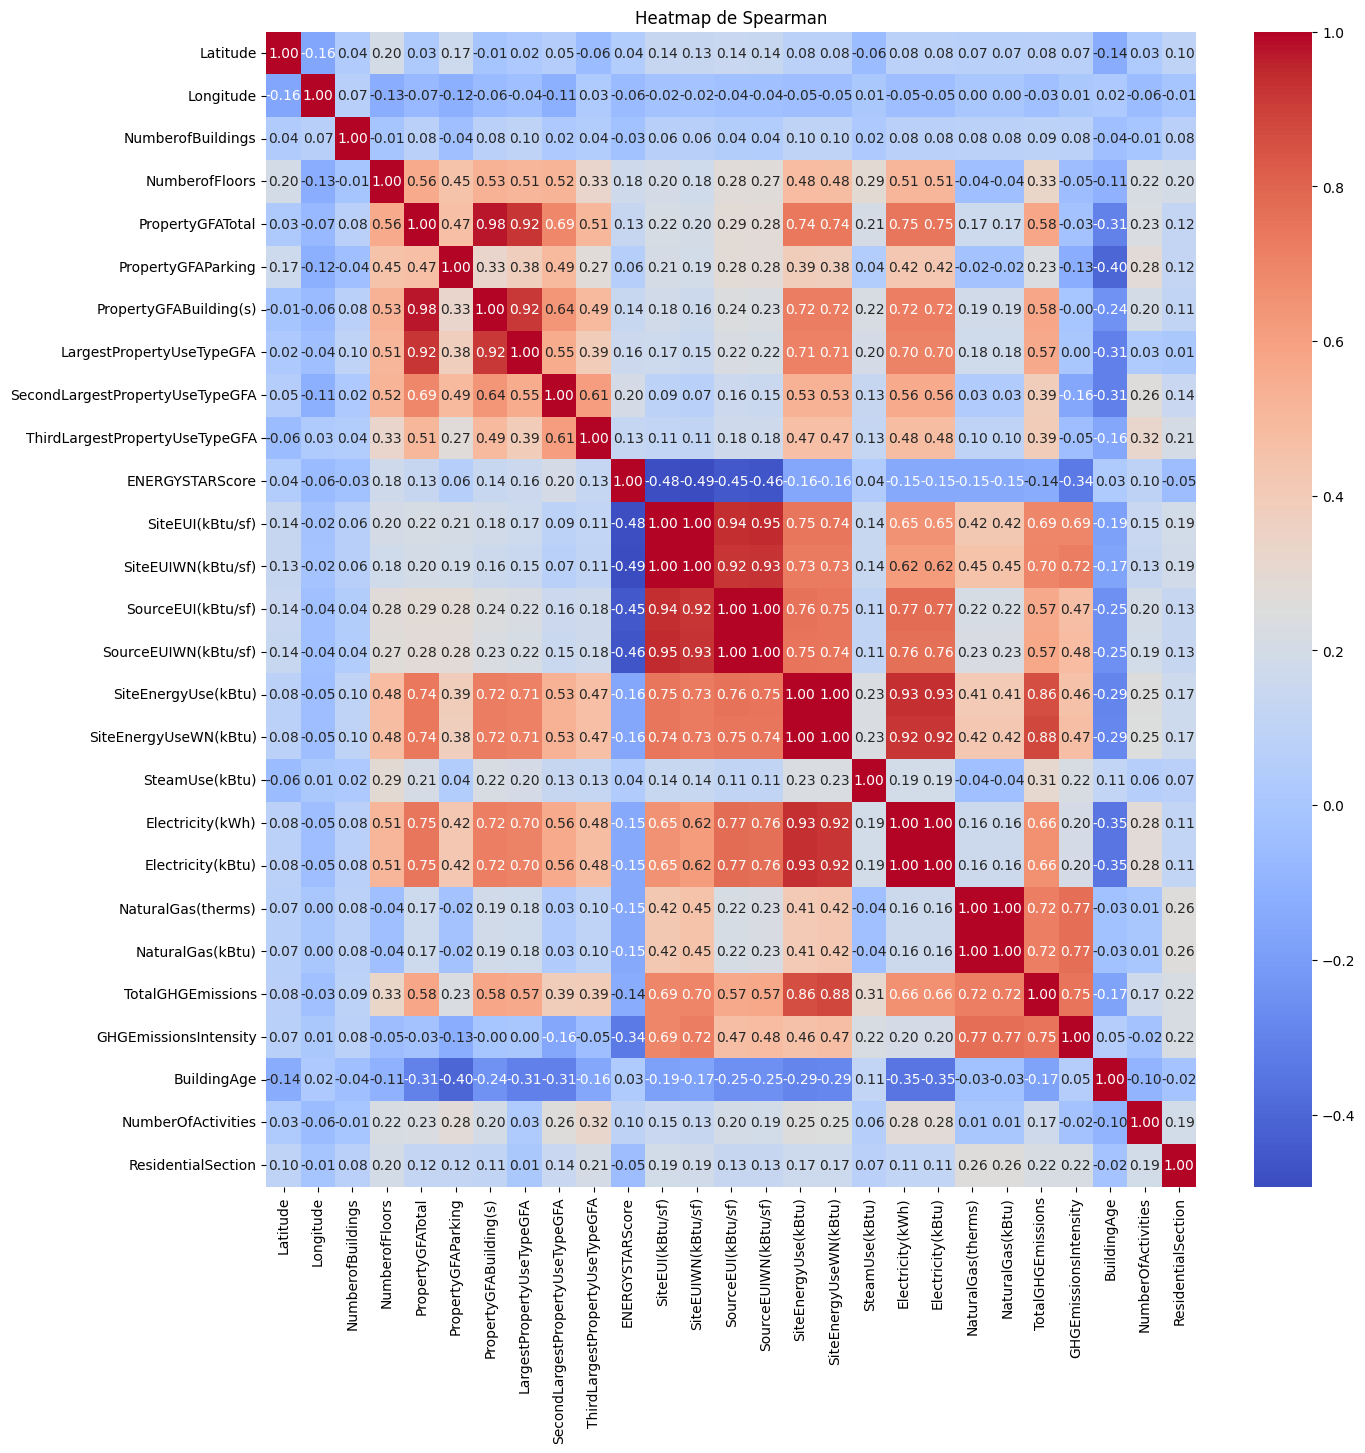

In [74]:
# Heatmap de la matrice de Spearman
correlation_matrix = df_filtred.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Spearman')
plt.show()

In [75]:
# Creation d'une colonne de surface moyenne par bâtiment
df_filtred['AverageFloorArea'] = df_filtred['PropertyGFATotal'] / df_filtred['NumberofFloors'].round(2)

In [76]:
# Creation d'une colonne du ratio Parking sur la surface totale du bâtiment
df_filtred['Parking_ratio']=(df_filtred['PropertyGFAParking']/df_filtred['PropertyGFATotal']*100).round(2)

In [77]:
df_filtred = df_filtred.dropna(subset=['LargestPropertyUseTypeGFA'])
df_filtred['LargestPropertyUseTypeGFA_ratio'] = (df_filtred['LargestPropertyUseTypeGFA'] / df_filtred['PropertyGFATotal']*100).round(2)

<ipython-input-77-d98cf165053b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtred['LargestPropertyUseTypeGFA_ratio'] = (df_filtred['LargestPropertyUseTypeGFA'] / df_filtred['PropertyGFATotal']*100).round(2)


In [78]:
# Caractéristiques & Surfaces du bâtiment - Fortement corrélées : 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' , 'ThirdLargestPropertyUseTypeGFA'
colonnes_a_supprimer = ['PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','NumberofFloors']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [79]:
# Informations énergétiques - Fortement corrélées / Choix de la target pour prédiction d'énergie : 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'
colonnes_a_supprimer = ['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [80]:
# Relevés énergétiques coûteux - Fortement corrélées / Choix de la target pour prédiction d'emissions CO² : 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
colonnes_a_supprimer = ['SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)','NaturalGas(kBtu)','GHGEmissionsIntensity']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

In [81]:
colonnes_a_supprimer = ['PropertyGFAParking']
df_filtred = df_filtred.drop(colonnes_a_supprimer, axis=1)

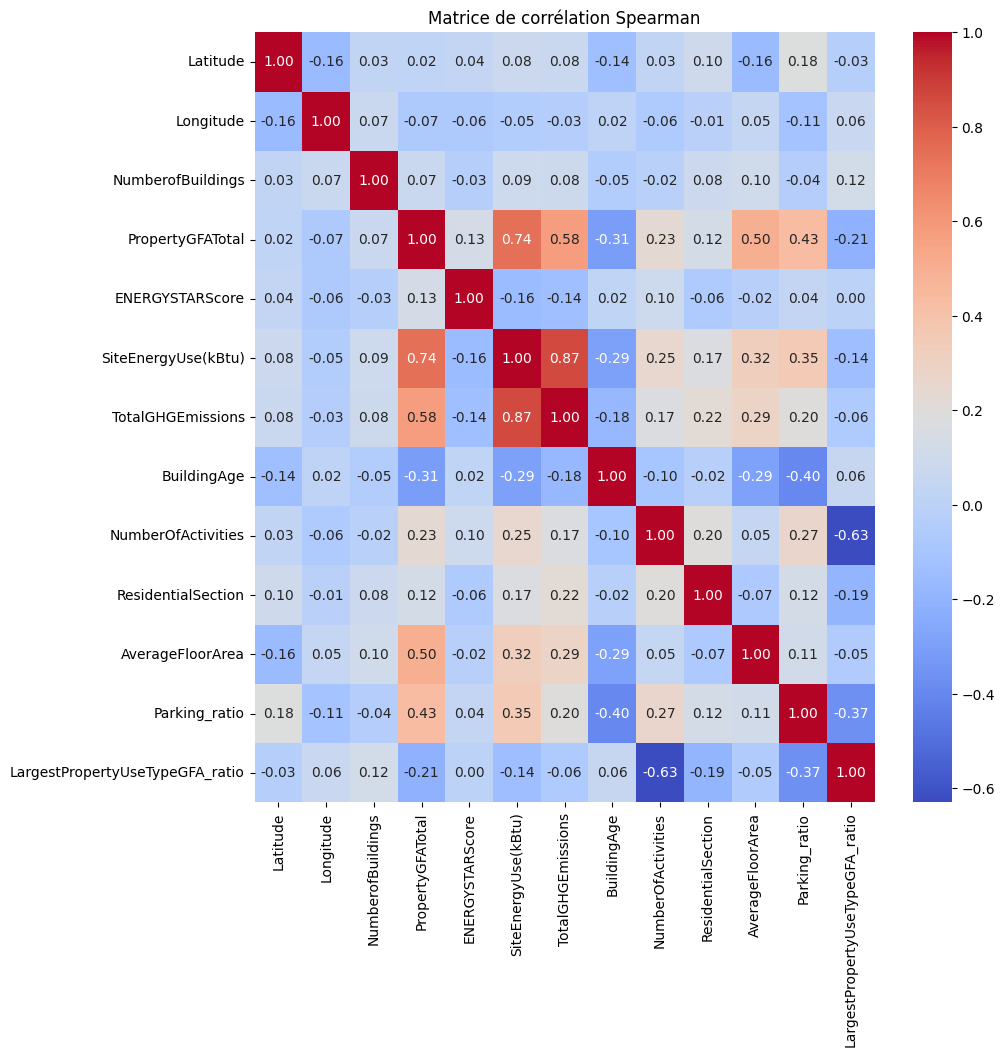

In [82]:
# Matrice de corrélation - Après filtrage des variables
correlation_matrix = df_filtred.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation Spearman')
plt.show()

In [83]:
#Valeurs infinies dans le DataFrame ?
print((df_filtred == np.inf).sum())

PrimaryPropertyType                0
Neighborhood                       0
Latitude                           0
Longitude                          0
NumberofBuildings                  0
PropertyGFATotal                   0
ENERGYSTARScore                    0
SiteEnergyUse(kBtu)                0
TotalGHGEmissions                  0
BuildingAge                        0
NumberOfActivities                 0
ResidentialSection                 0
AverageFloorArea                   8
Parking_ratio                      0
LargestPropertyUseTypeGFA_ratio    0
dtype: int64


In [84]:
# Remplacement des valeurs infinies par NaN et suppression des lignes avec des valeurs NaN dans 'AverageFloorArea'
df_filtred['AverageFloorArea'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_filtred.dropna(subset=['AverageFloorArea'], inplace=True)

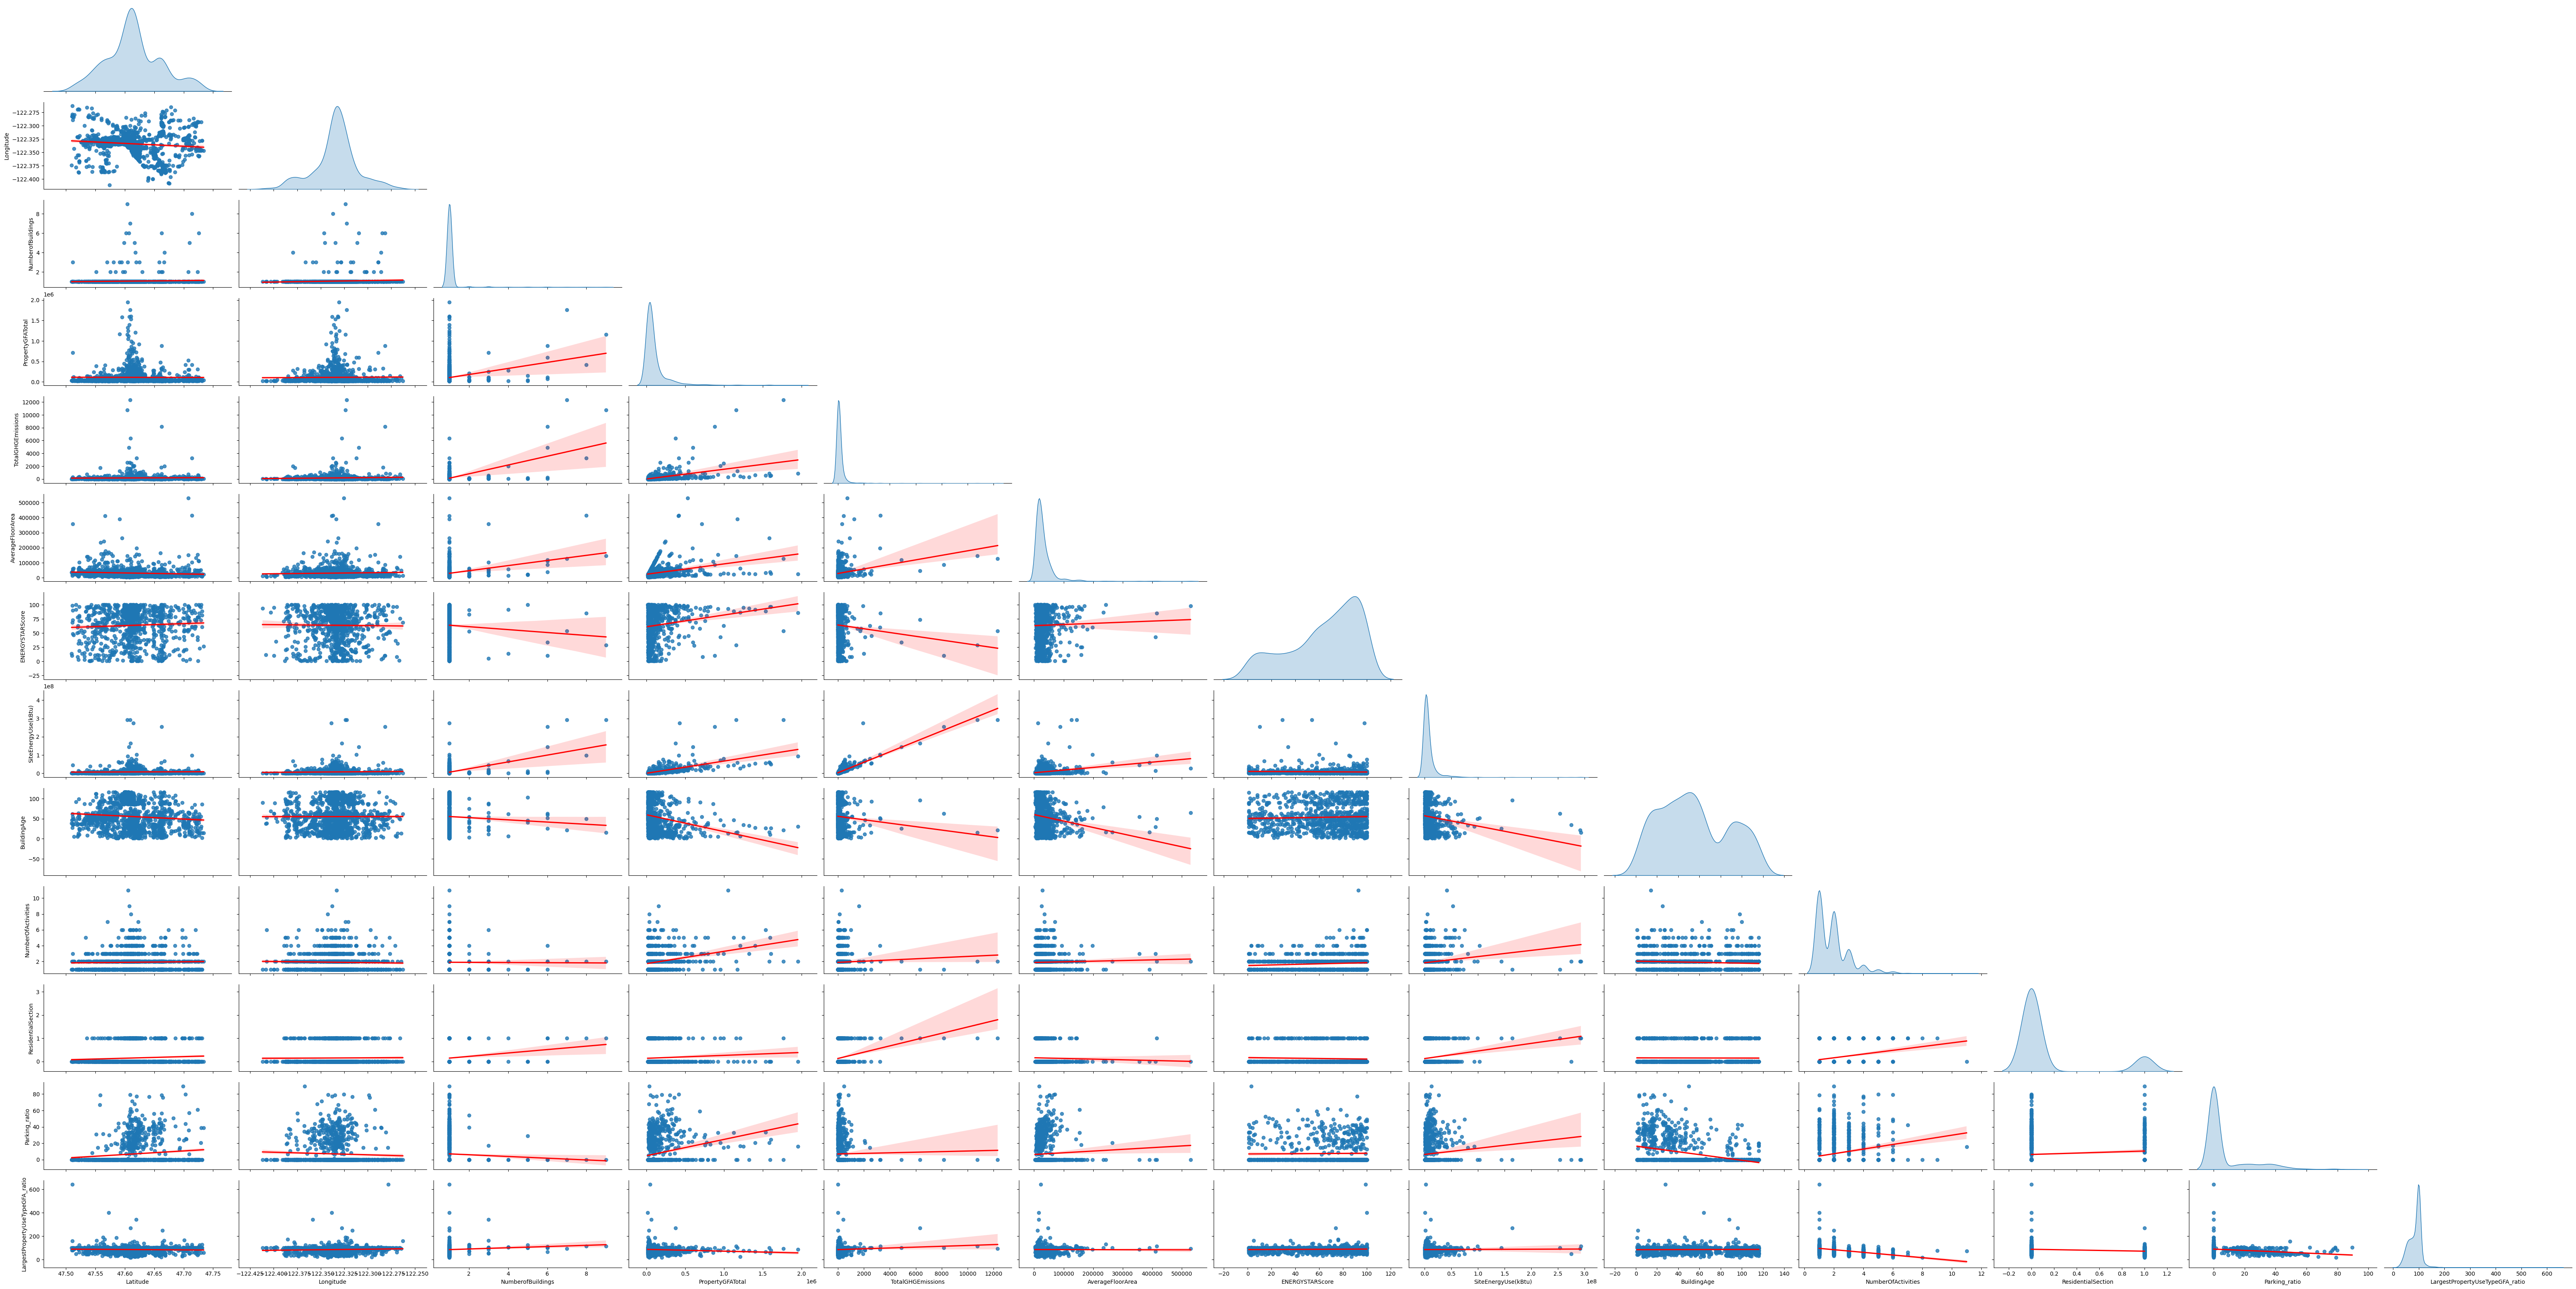

In [85]:
# Visualisation graphique des 'relations' entre features
sns.pairplot(df_filtred[['Latitude', 'Longitude', 'NumberofBuildings','PropertyGFATotal','TotalGHGEmissions','AverageFloorArea',
                             'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'BuildingAge', 'NumberOfActivities',
                             'ResidentialSection', 'Parking_ratio','LargestPropertyUseTypeGFA_ratio']],
                 corner=True,
                 kind='reg',
                 plot_kws={'line_kws':{'color':'red'}},
                 diag_kind="kde",
                 aspect=2)

plt.show()

In [86]:
# Calcul de la skewness pour chaque variable numérique
df_numeric = df_filtred.select_dtypes(include=[np.number])

skewness_data = [(column, df_numeric[column].skew()) for column in df_numeric.columns]

skewness_df = pd.DataFrame(skewness_data, columns=['Column', 'Skewness'])

skewness_df

Column   Skewness
0                          Latitude   0.279626
1                         Longitude  -0.181425
2                 NumberofBuildings   9.801974
3                  PropertyGFATotal   4.822461
4                   ENERGYSTARScore  -0.686352
5               SiteEnergyUse(kBtu)   9.358619
6                 TotalGHGEmissions  13.422347
7                       BuildingAge   0.275485
8                NumberOfActivities   1.962929
9                ResidentialSection   1.939626
10                 AverageFloorArea   6.118060
11                    Parking_ratio   2.269647
12  LargestPropertyUseTypeGFA_ratio   6.205282

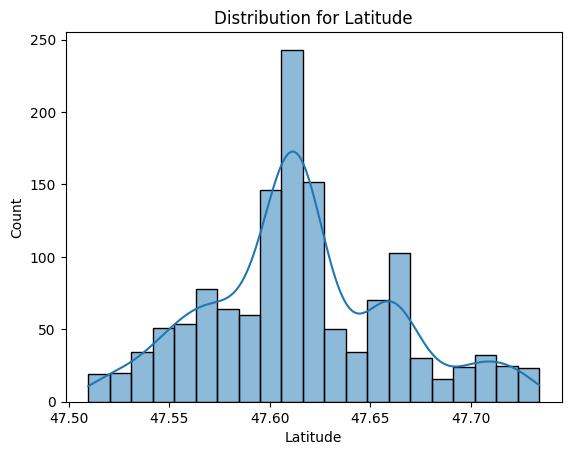

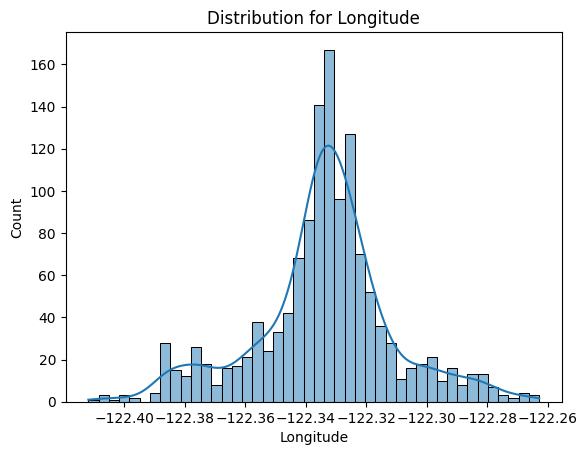

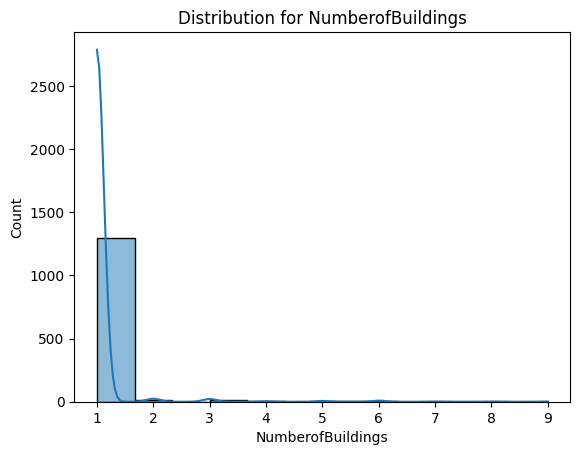

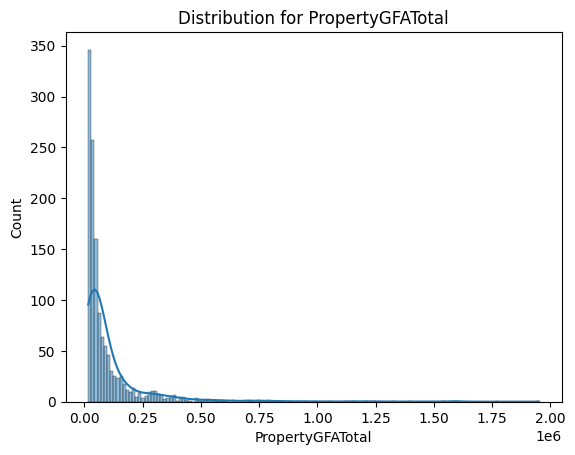

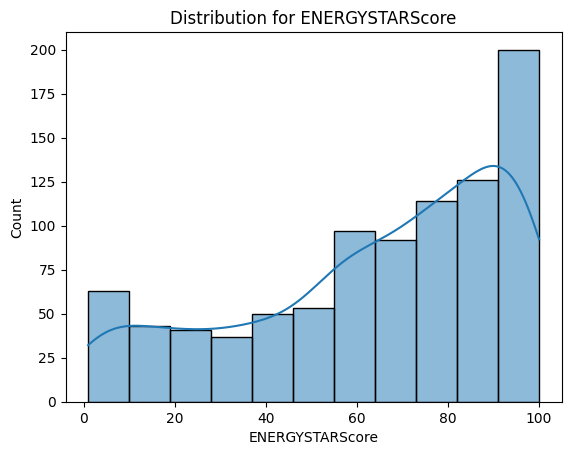

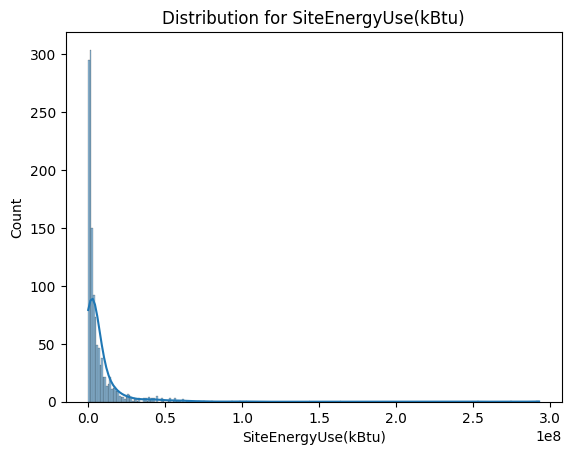

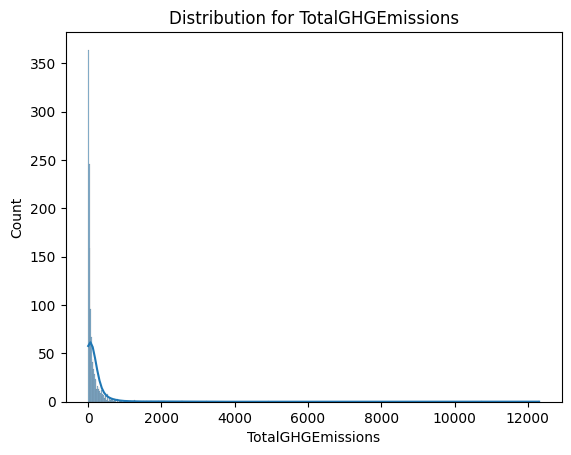

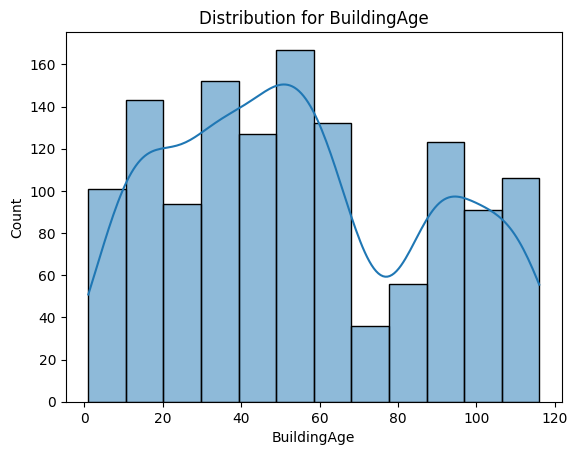

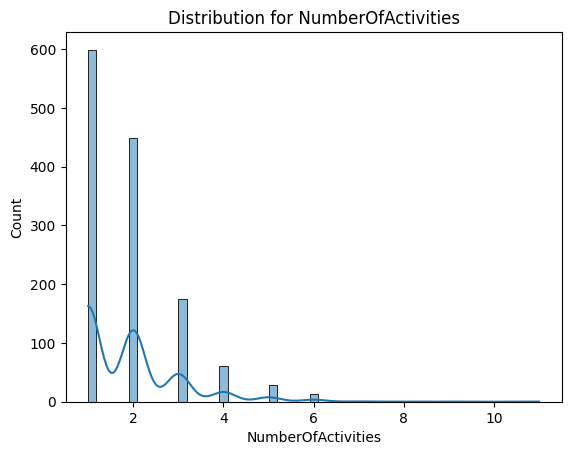

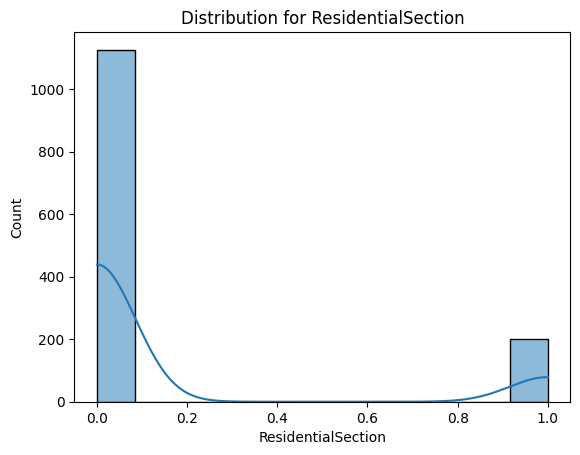

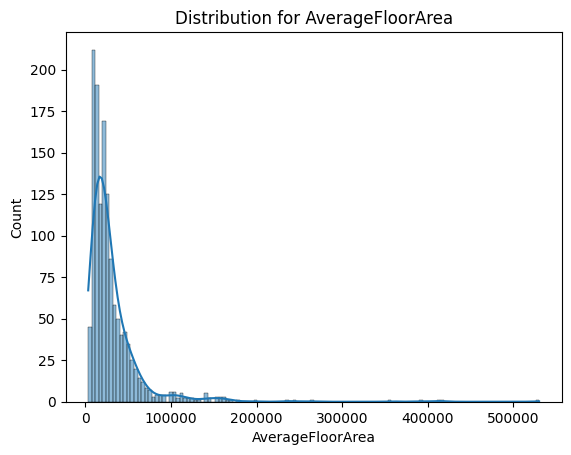

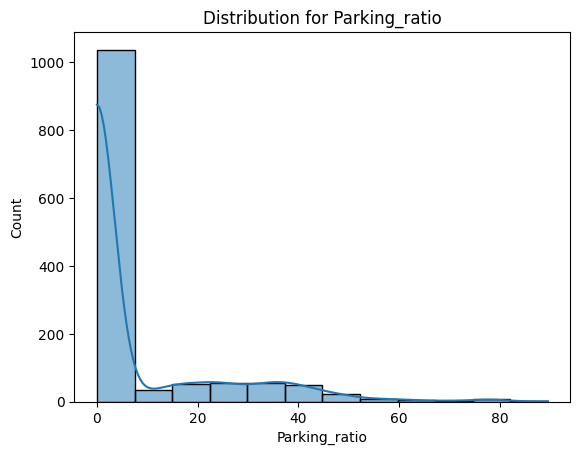

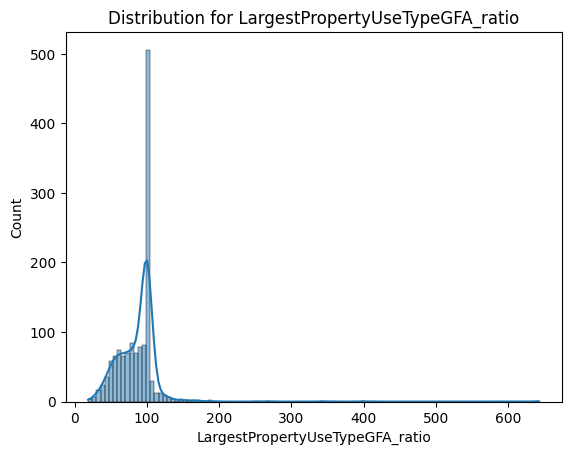

In [87]:
# Graphique de distribution des variables
for column in df_numeric.columns:
    sns.histplot(df_numeric[column], kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

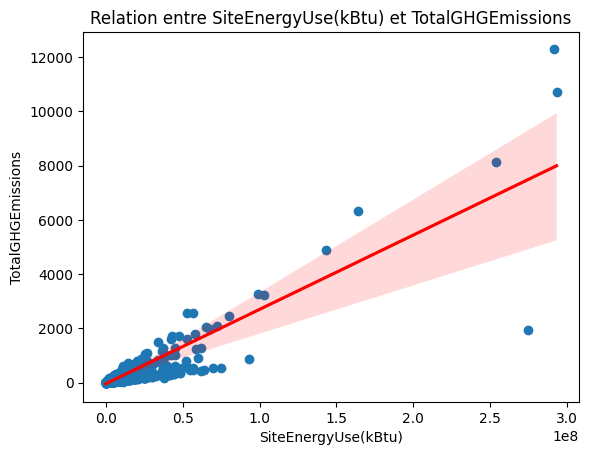

In [88]:
# Graphique de la relation entre les 2 targets
plt.scatter(df_filtred['SiteEnergyUse(kBtu)'], df_filtred['TotalGHGEmissions'])
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('TotalGHGEmissions')
plt.title('Relation entre SiteEnergyUse(kBtu) et TotalGHGEmissions')
sns.regplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=df_filtred, scatter_kws={'s': 5}, line_kws={'color': 'red'})

plt.show()

In [89]:
# Calcul du coefficient de corrélation de Pearson entre la consommation d'énergie du site et les émissions totales de GES
correlation = df_filtred['SiteEnergyUse(kBtu)'].corr(df_filtred['TotalGHGEmissions'])
print(f'Le coefficient de corrélation de Pearson est : {correlation}')

Le coefficient de corrélation de Pearson est : 0.8857077116072525


In [90]:
# Définition des transformateurs pour les caractéristiques catégorielles et numériques
categorical_features = ['PrimaryPropertyType', 'Neighborhood']

numeric_features_log_transform = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions','NumberofBuildings','NumberOfActivities','PropertyGFATotal','AverageFloorArea','Parking_ratio','LargestPropertyUseTypeGFA_ratio']

categorical_transformer = OneHotEncoder(sparse_output=False)
log_transformer = FunctionTransformer(np.log1p, validate=False)

In [91]:
# Création du préprocesseur pour les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('log', log_transformer, numeric_features_log_transform)
    ],
    remainder='passthrough'
)

In [92]:
# Pipeline de pré-traitement des données
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [93]:
# Application du pipeline de prétraitement et création du DataFrame final pour la modélisation
df_filtred_processed = pipeline.fit_transform(df_filtred)

encoded_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

log_transformed_columns = [f'log_{col}' for col in numeric_features_log_transform]

remaining_columns = df_filtred.columns.drop(categorical_features + numeric_features_log_transform)

all_columns = np.concatenate([encoded_columns, log_transformed_columns, remaining_columns], axis=0)

df_model = pd.DataFrame(df_filtred_processed, columns=all_columns)

In [94]:
# Aperçu du df_model pour modelisation des prédictions
df_model

PrimaryPropertyType_Education  PrimaryPropertyType_Food Service  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   
...                             ...                               ...   
1323                            0.0                               0.0   
1324                            0.0                               0.0   
1325                            0.0                               0.0   
1326                            1.0                               0.0   
1327                            0.0                               0.0   

      PrimaryPropertyType_Healthcare  PrimaryPropertyType_Hospitality  \
0                                0.0                              1.0   
1                                0.0                              1.0   
2                                0.0                              1.0   
3                                0.0                              1.0   
4                                0.0                              1.0   
...                              ...                              ...   
1323                             0.0                              1.0   
1324                             0.0                              0.0   
1325                             0.0                              0.0   
1326                             0.0                              0.0   
1327                             0.0                              0.0   

      PrimaryPropertyType_Mixed Use  PrimaryPropertyType_Office  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
...                             ...                         ...   
1323                            0.0                         0.0   
1324                            0.0                         0.0   
1325                            0.0                         1.0   
1326                            0.0                         0.0   
1327                            1.0                         0.0   

      PrimaryPropertyType_Other  PrimaryPropertyType_Religious  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   
...                         ...                            ...   
1323                        0.0                            0.0   
1324                        0.0                            0.0   
1325                        0.0                            0.0   
1326                        0.0                            0.0   
1327                        0.0                            0.0   

      PrimaryPropertyType_Retail  PrimaryPropertyType_Storage  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   
...                          ...                          ...   
1323                         0.0                          0.0   
1324                         0.0                          1.0   
1325                         0.0                          0.0   
1326

In [95]:
# Enregistrement du dataframe pour les notebooks de modelisation
df_model.to_csv('df_model_energy_filtred.csv', index=False)

In [96]:
# Téléchargement du fichier
from google.colab import files
files.download('df_model_energy_filtred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion :**  

**Nettoyage et Ingénierie des Caractéristiques :** Création de la colonne BuildingAge pour mieux comprendre l'impact de l'âge des bâtiments sur les autres variables. Des colonnes redondantes ont été supprimées pour alléger le jeu de données et éviter la multicolinéarité.
La colonne NumberOfActivities a été introduite pour quantifier la diversité des usages des bâtiments, et la colonne binaire ResidentialSection a été créée pour distinguer les sections résidentielles.

**Regroupement des Types de Propriétés :** Simplification de la variable PrimaryPropertyType en regroupant les types de propriétés en catégories plus générales

**Analyse de Corrélation :** Une heatmap de la matrice de Spearman a été utilisée pour visualiser les corrélations entre les variables numériques, ce qui a guidé notre décision de supprimer certaines colonnes fortement corrélées pour réduire la redondance.

**Introduction de Nouvelles Variables :** AverageFloorArea et Parking_ratio ont été introduites pour capturer des aspects spécifiques des bâtiments, et des colonnes avec des valeurs infinies ont été traitées pour assurer l'intégrité des données.

**Visualisation des Relations entre Caractéristiques :** Des graphiques (pairplot) ont été utilisés pour visualiser les relations entre les variables sélectionnées, et un graphique de dispersion a mis en évidence la relation entre la consommation énergétique et les émissions de gaz à effet de serre.
Encodage des Variables Catégorielles:

**'One-Hot Encoding' :** Utilisée pour transformer les variables catégorielles en un format numérique adapté aux algorithmes de machine learning.

**Transformation logarithmique :** Utilisée sur les variables numériques 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'NumberofBuildings', 'NumberOfActivities', 'PropertyGFATotal', 'AverageFloorArea', 'Parking_ratio', 'LargestPropertyUseTypeGFA_ratio' dans le but de normaliser leur distribution.

**Pipeline de Prétraitement :**Construction pour intégrer les étapes de transformation des données, aboutissant à un jeu de données transformé et prêt pour la modélisation.

**Préparation Finale pour la Modélisation :** Le DataFrame df_model contient les données finales après prétraitement, avec 1328 enregistrements & 36 features.